In [1]:
import numpy    as np
import pandas   as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics

National Olympic Committees (NOCs)

In [6]:
# import countries competing in Olympics
regions = pd.read_csv("noc_regions.csv")

# drop extraneous country columns
regions = regions.drop(['notes'], axis=1)

# show Olympic countries
print(regions.shape)
regions.head()

(230, 2)


NOC       region
0  AFG  Afghanistan
1  AHO      Curacao
2  ALB      Albania
3  ALG      Algeria
4  AND      Andorra

Host Cities of the Olympic Games

In [100]:
# print host country committees
hosts = pd.read_csv("host_cities.csv")
print(hosts.shape)
hosts

(42, 3)


Host City Host Country  Unnamed: 2
0                Barcelona          ESP         NaN
1                   London          GBR         NaN
2                Antwerpen          BEL         NaN
3                    Paris          FRA         NaN
4                  Calgary          CAN         NaN
5              Albertville          FRA         NaN
6              Lillehammer          NOR         NaN
7              Los Angeles          USA         NaN
8           Salt Lake City          USA         NaN
9                 Helsinki          FIN         NaN
10             Lake Placid          USA         NaN
11                  Sydney          AUS         NaN
12                 Atlanta          USA         NaN
13               Stockholm          SWE         NaN
14                   Sochi          RUS         NaN
15                  Nagano          JPN         NaN
16                  Torino          ITA         NaN
17                 Beijing          CHN         NaN
18          Rio de Janeiro          BRA         NaN
19                  Athina          GRE         NaN
20            Squaw Valley          USA         NaN
21               Innsbruck          SUI         NaN
22                Sarajevo          YUG         NaN
23             Mexico City          MEX         NaN
24                  Munich          GDR         NaN
25                   Seoul          KOR         NaN
26                  Berlin          GER         NaN
27                    Oslo          NOR         NaN
28       Cortina d'Ampezzo          ITA         NaN
29               Melbourne          AUS         NaN
30                    Roma          ITA         NaN
31               Amsterdam          NED         NaN
32                Montreal          CAN         NaN
33                  Moskva          URS         NaN
34                   Tokyo          JPN         NaN
35               Vancouver          CAN         NaN
36                Grenoble          FRA         NaN
37                 Sapporo          JPN         NaN
38                Chamonix          FRA         NaN
39               St. Louis          USA         NaN
40            Sankt Moritz          SUI         NaN
41  Garmisch-Partenkirchen          GER         NaN

Olympic Athletes & Events

In [101]:
# import list of athletes competing in events
games = pd.read_csv("athlete_events.csv")

# merge host countries
games = games.merge(hosts, left_on='City', right_on='Host City')
games = games.sort_values(by = ['Games','NOC'])

# show athletes and events
print(games.shape)
games.head()

(271116, 18)


ID                        Name Sex   Age  Height  Weight  \
159033  35698  Edwin Harold "Teddy" Flack   M  22.0     NaN     NaN   
159034  35698  Edwin Harold "Teddy" Flack   M  22.0     NaN     NaN   
159035  35698  Edwin Harold "Teddy" Flack   M  22.0     NaN     NaN   
159036  35698  Edwin Harold "Teddy" Flack   M  22.0     NaN     NaN   
159037  35698  Edwin Harold "Teddy" Flack   M  22.0     NaN     NaN   

                           Team  NOC        Games  Year  Season    City  \
159033                Australia  AUS  1896 Summer  1896  Summer  Athina   
159034  Australia/Great Britain  AUS  1896 Summer  1896  Summer  Athina   
159035                Australia  AUS  1896 Summer  1896  Summer  Athina   
159036                Australia  AUS  1896 Summer  1896  Summer  Athina   
159037                Australia  AUS  1896 Summer  1896  Summer  Athina   

            Sport                         Event   Medal Host City  \
159033     Tennis          Tennis Men's Singles     NaN    Athina   
159034     Tennis          Tennis Men's Doubles  Bronze    Athina   
159035  Athletics    Athletics Men's 800 metres    Gold    Athina   
159036  Athletics  Athletics Men's 1,500 metres    Gold    Athina   
159037  Athletics      Athletics Men's Marathon     NaN    Athina   

       Host Country  Unnamed: 2  
159033          GRE         NaN  
159034          GRE         NaN  
159035          GRE         NaN  
159036          GRE         NaN  
159037          GRE         NaN

In [102]:
print(len(games['Host Country'].unique()))
games['Host Country'].unique()

24


array(['GRE', 'FRA', 'USA', 'GBR', 'SWE', 'BEL', 'NED', 'SUI', 'GER',
       'FIN', 'NOR', 'AUS', 'ITA', 'JPN', 'MEX', 'GDR', 'CAN', 'URS',
       'YUG', 'KOR', 'ESP', 'CHN', 'RUS', 'BRA'], dtype=object)

In [103]:
print(len(games['NOC'].unique()))
games['NOC'].unique()

230


array(['AUS', 'AUT', 'DEN', 'FRA', 'GBR', 'GER', 'GRE', 'HUN', 'ITA',
       'SUI', 'SWE', 'USA', 'ARG', 'BEL', 'BOH', 'BRA', 'CAN', 'COL',
       'CUB', 'ESP', 'HAI', 'IND', 'IRI', 'LUX', 'MEX', 'NED', 'NOR',
       'NZL', 'PER', 'ROU', 'RUS', 'NFL', 'RSA', 'CRT', 'EGY', 'FIN',
       'TUR', 'ANZ', 'ISL', 'CHI', 'JPN', 'POL', 'POR', 'SRB', 'UNK',
       'EST', 'MON', 'TCH', 'YUG', 'BUL', 'ECU', 'IRL', 'LAT', 'LTU',
       'PHI', 'URU', 'NEP', 'MLT', 'PAN', 'ZIM', 'CHN', 'ESA', 'GUA',
       'VEN', 'AFG', 'BER', 'BOL', 'CRC', 'LIE', 'GUY', 'IRQ', 'JAM',
       'KOR', 'LIB', 'MYA', 'PAK', 'PUR', 'SGP', 'SRI', 'SYR', 'TTO',
       'AHO', 'BAH', 'GHA', 'HKG', 'INA', 'ISR', 'NGR', 'SAA', 'THA',
       'URS', 'VNM', 'CAM', 'ETH', 'FIJ', 'KEN', 'LBR', 'MAL', 'NBO',
       'TPE', 'UGA', 'MAR', 'RHO', 'SMR', 'SUD', 'TUN', 'UAR', 'WIF',
       'ALG', 'CGO', 'CHA', 'CIV', 'CMR', 'DOM', 'MAD', 'MAS', 'MGL',
       'MLI', 'NIG', 'SEN', 'TAN', 'ZAM', 'PRK', 'BAR', 'BIZ', 'CAF',
       'COD', 'FRG',

In [104]:
print(len(games['Games'].unique()))
games['Games'].unique()

51


array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

In [12]:
print(len(games['Sport'].unique()))
games['Sport'].unique()

66


array(['Tennis', 'Athletics', 'Swimming', 'Cycling', 'Fencing',
       'Weightlifting', 'Gymnastics', 'Shooting', 'Wrestling',
       'Equestrianism', 'Rowing', 'Water Polo', 'Football', 'Archery',
       'Tug-Of-War', 'Basque Pelota', 'Rugby', 'Sailing', 'Cricket',
       'Croquet', 'Polo', 'Golf', 'Lacrosse', 'Diving', 'Boxing', 'Roque',
       'Figure Skating', 'Hockey', 'Motorboating', 'Racquets',
       'Jeu De Paume', 'Modern Pentathlon', 'Art Competitions',
       'Ice Hockey', 'Alpinism', 'Speed Skating', 'Bobsleigh',
       'Military Ski Patrol', 'Cross Country Skiing', 'Nordic Combined',
       'Ski Jumping', 'Curling', 'Skeleton', 'Handball', 'Canoeing',
       'Basketball', 'Aeronautics', 'Alpine Skiing', 'Biathlon', 'Judo',
       'Volleyball', 'Luge', 'Synchronized Swimming',
       'Rhythmic Gymnastics', 'Table Tennis', 'Badminton', 'Baseball',
       'Freestyle Skiing', 'Short Track Speed Skating',
       'Beach Volleyball', 'Softball', 'Snowboarding', 'Triathlon',
    

In [107]:
print(len(games['Medal'].unique()))
games['Medal'].unique()

4


array([nan, 'Bronze', 'Gold', 'Silver'], dtype=object)

In [15]:
# check games for null values
print(games.isnull().sum())

ID                   0
Name                 0
Sex                  0
Age               9474
Height           60171
Weight           62875
Team                 0
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           231333
Host City            0
Host Country         0
Unnamed: 2      271116
dtype: int64


In [16]:
# drop extraneous athlete and event columns
games = games.drop(['ID','Age','Height','Weight','Team','City','Host City'], axis = 1)
games = games.merge(regions, on='NOC')
games = games.rename(columns={'Name':   'Athlete',
                              'region': 'Region',
                              'Sex':    'Gender'})
games = games[['Year',
               'Season',
               'Games',
               'Host Country',
               'NOC',
               'Region',
               'Athlete',
               'Gender',
               'Sport',
               'Event',
               'Medal']]
games.head(20)

Year  Season        Games Host Country  NOC     Region  \
0   1896  Summer  1896 Summer          GRE  AUS  Australia   
1   1896  Summer  1896 Summer          GRE  AUS  Australia   
2   1896  Summer  1896 Summer          GRE  AUS  Australia   
3   1896  Summer  1896 Summer          GRE  AUS  Australia   
4   1896  Summer  1896 Summer          GRE  AUS  Australia   
5   1900  Summer  1900 Summer          FRA  AUS  Australia   
6   1900  Summer  1900 Summer          FRA  AUS  Australia   
7   1900  Summer  1900 Summer          FRA  AUS  Australia   
8   1900  Summer  1900 Summer          FRA  AUS  Australia   
9   1900  Summer  1900 Summer          FRA  AUS  Australia   
10  1900  Summer  1900 Summer          FRA  AUS  Australia   
11  1904  Summer  1904 Summer          USA  AUS  Australia   
12  1904  Summer  1904 Summer          USA  AUS  Australia   
13  1904  Summer  1904 Summer          USA  AUS  Australia   
14  1904  Summer  1904 Summer          USA  AUS  Australia   
15  1904  Summer  1904 Summer          USA  AUS  Australia   
16  1904  Summer  1904 Summer          USA  AUS  Australia   
17  1906  Summer  1906 Summer          GRE  AUS  Australia   
18  1906  Summer  1906 Summer          GRE  AUS  Australia   
19  1906  Summer  1906 Summer          GRE  AUS  Australia   

                                Athlete Gender      Sport  \
0            Edwin Harold "Teddy" Flack      M     Tennis   
1            Edwin Harold "Teddy" Flack      M     Tennis   
2            Edwin Harold "Teddy" Flack      M  Athletics   
3            Edwin Harold "Teddy" Flack      M  Athletics   
4            Edwin Harold "Teddy" Flack      M  Athletics   
5   Frederick Claude Vivian "Fred" Lane      M   Swimming   
6   Frederick Claude Vivian "Fred" Lane      M   Swimming   
7          Stanley Rupert "Stan" Rowley      M  Athletics   
8          Stanley Rupert "Stan" Rowley      M  Athletics   
9          Stanley Rupert "Stan" Rowley      M  Athletics   
10         Stanley Rupert "Stan" Rowley      M  Athletics   
11               Francis "Frank" Gailey      M   Swimming   
12               Francis "Frank" Gailey      M   Swimming   
13               Francis "Frank" Gailey      M   Swimming   
14               Francis "Frank" Gailey      M   Swimming   
15                 Corrie Henry Gardner      M  Athletics   
16                 Corrie Henry Gardner      M  Athletics   
17                   Nigel Chase Barker      M  Athletics   
18                   Nigel Chase Barker      M  Athletics   
19                 George Bernard Blake      M  Athletics   

                                        Event   Medal  
0                        Tennis Men's Singles     NaN  
1                        Tennis Men's Doubles  Bronze  
2                  Athletics Men's 800 metres    Gold  
3                Athletics Men's 1,500 metres    Gold  
4                    Athletics Men's Marathon     NaN  
5         Swimming Men's 200 metres Freestyle    Gold  
6   Swimming Men's 200 metres Obstacle Course    Gold  
7                   Athletics Men's 60 metres  Bronze  
8                  Athletics Men's 100 metres  Bronze  
9                  Athletics Men's 200 metres  Bronze  
10         Athletics Men's 5,000 metres, Team    Gold  
11          Swimming Men's 220 yard Freestyle  Silver  
12          Swimming Men's 440 yard Freestyle  Silver  
13          Swimming Men's 880 yard Freestyle  Silver  
14          Swimming Men's One Mile Freestyle  Bronze  
15         Athletics Men's 110 metres Hurdles     NaN  
16                  Athletics Men's Long Jump     NaN  
17                 Athletics Men's 100 metres  Bronze  
18                 Athletics Men's 400 metres  Bronze  
19               Athletics Men's 1,500 metres     NaN

In [17]:
# check games for null values
print(games.isnull().sum())

Year                 0
Season               0
Games                0
Host Country         0
NOC                  0
Region              21
Athlete              0
Gender               0
Sport                0
Event                0
Medal           230993
dtype: int64


In [18]:
games.head()

Year  Season        Games Host Country  NOC     Region  \
0  1896  Summer  1896 Summer          GRE  AUS  Australia   
1  1896  Summer  1896 Summer          GRE  AUS  Australia   
2  1896  Summer  1896 Summer          GRE  AUS  Australia   
3  1896  Summer  1896 Summer          GRE  AUS  Australia   
4  1896  Summer  1896 Summer          GRE  AUS  Australia   

                      Athlete Gender      Sport                         Event  \
0  Edwin Harold "Teddy" Flack      M     Tennis          Tennis Men's Singles   
1  Edwin Harold "Teddy" Flack      M     Tennis          Tennis Men's Doubles   
2  Edwin Harold "Teddy" Flack      M  Athletics    Athletics Men's 800 metres   
3  Edwin Harold "Teddy" Flack      M  Athletics  Athletics Men's 1,500 metres   
4  Edwin Harold "Teddy" Flack      M  Athletics      Athletics Men's Marathon   

    Medal  
0     NaN  
1  Bronze  
2    Gold  
3    Gold  
4     NaN

In [19]:
games['Summer']     = games['Season'] == 'Summer'
games['Female']     = games['Gender'] == 'F'
games['Gold']       = games['Medal']  == 'Gold'
games['Silver']     = games['Medal']  == 'Silver'
games['Bronze']     = games['Medal']  == 'Bronze'
games['Home Field'] = games['NOC']    == games['Host Country']
games.head()

Year  Season        Games Host Country  NOC     Region  \
0  1896  Summer  1896 Summer          GRE  AUS  Australia   
1  1896  Summer  1896 Summer          GRE  AUS  Australia   
2  1896  Summer  1896 Summer          GRE  AUS  Australia   
3  1896  Summer  1896 Summer          GRE  AUS  Australia   
4  1896  Summer  1896 Summer          GRE  AUS  Australia   

                      Athlete Gender      Sport                         Event  \
0  Edwin Harold "Teddy" Flack      M     Tennis          Tennis Men's Singles   
1  Edwin Harold "Teddy" Flack      M     Tennis          Tennis Men's Doubles   
2  Edwin Harold "Teddy" Flack      M  Athletics    Athletics Men's 800 metres   
3  Edwin Harold "Teddy" Flack      M  Athletics  Athletics Men's 1,500 metres   
4  Edwin Harold "Teddy" Flack      M  Athletics      Athletics Men's Marathon   

    Medal  Summer  Female   Gold  Silver  Bronze  Home Field  
0     NaN    True   False  False   False   False       False  
1  Bronze    True   False  False   False    True       False  
2    Gold    True   False   True   False   False       False  
3    Gold    True   False   True   False   False       False  
4     NaN    True   False  False   False   False       False

In [20]:
# total sport and event participation by games and country
medals = pd.DataFrame(games.groupby(['Games','NOC','Region'])['Athlete','Sport','Event'].nunique())
medals.head()

<ipython-input-20-c3b18bf18c23>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medals = pd.DataFrame(games.groupby(['Games','NOC','Region'])['Athlete','Sport','Event'].nunique())


Athlete  Sport  Event
Games       NOC Region                          
1896 Summer AUS Australia        1      2      5
            AUT Austria          3      3      8
            DEN Denmark          3      5     12
            FRA France          12      6     18
            GBR UK              10      7     19

In [21]:
# total females and gold, silver and bronze medals by games and country
df     = pd.DataFrame(games.groupby(['Games','NOC','Region','Athlete'])['Female'].mean())
df     = df.groupby(['Games','NOC','Region']).sum()
medals = medals.merge(df, left_index=True, right_index=True)
medals.head()

Athlete  Sport  Event  Female
Games       NOC Region                                  
1896 Summer AUS Australia        1      2      5     0.0
            AUT Austria          3      3      8     0.0
            DEN Denmark          3      5     12     0.0
            FRA France          12      6     18     0.0
            GBR UK              10      7     19     0.0

In [22]:
# total medal count by games and country
df     = pd.DataFrame(games.groupby(['Games','NOC','Region','Event'])['Medal'].nunique())
df     = df.groupby(['Games','NOC','Region']).sum()
medals = medals.merge(df, left_index=True, right_index=True)
medals.head()

Athlete  Sport  Event  Female  Medal
Games       NOC Region                                         
1896 Summer AUS Australia        1      2      5     0.0      3
            AUT Austria          3      3      8     0.0      5
            DEN Denmark          3      5     12     0.0      6
            FRA France          12      6     18     0.0     11
            GBR UK              10      7     19     0.0      9

In [23]:
# total medal count by games and country
df     = games.groupby(['Games','NOC','Region','Event'])['Gold','Silver','Bronze'].sum()
df     = df.clip(upper=1)
df     = df.groupby(['Games','NOC','Region']).sum()
medals = medals.merge(df, left_index=True, right_index=True)
medals.head()

<ipython-input-23-82057282cc83>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df     = games.groupby(['Games','NOC','Region','Event'])['Gold','Silver','Bronze'].sum()


Athlete  Sport  Event  Female  Medal  Gold  Silver  \
Games       NOC Region                                                          
1896 Summer AUS Australia        1      2      5     0.0      3     2       0   
            AUT Austria          3      3      8     0.0      5     2       1   
            DEN Denmark          3      5     12     0.0      6     1       2   
            FRA France          12      6     18     0.0     11     5       4   
            GBR UK              10      7     19     0.0      9     3       3   

                           Bronze  
Games       NOC Region             
1896 Summer AUS Australia       1  
            AUT Austria         2  
            DEN Denmark         3  
            FRA France          2  
            GBR UK              3

In [24]:
# season, year and home-field advantage by games and country
df     = pd.DataFrame(games.groupby(['Games','NOC','Region'])['Summer','Year','Home Field'].mean())
medals = medals.merge(df, left_index=True, right_index=True)
medals.head()

<ipython-input-24-41043f644830>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df     = pd.DataFrame(games.groupby(['Games','NOC','Region'])['Summer','Year','Home Field'].mean())


Athlete  Sport  Event  Female  Medal  Gold  Silver  \
Games       NOC Region                                                          
1896 Summer AUS Australia        1      2      5     0.0      3     2       0   
            AUT Austria          3      3      8     0.0      5     2       1   
            DEN Denmark          3      5     12     0.0      6     1       2   
            FRA France          12      6     18     0.0     11     5       4   
            GBR UK              10      7     19     0.0      9     3       3   

                           Bronze  Summer  Year  Home Field  
Games       NOC Region                                       
1896 Summer AUS Australia       1     1.0  1896         0.0  
            AUT Austria         2     1.0  1896         0.0  
            DEN Denmark         3     1.0  1896         0.0  
            FRA France          2     1.0  1896         0.0  
            GBR UK              3     1.0  1896         0.0

In [25]:
medals = medals.reset_index()
medals.head()

Games  NOC     Region  Athlete  Sport  Event  Female  Medal  Gold  \
0  1896 Summer  AUS  Australia        1      2      5     0.0      3     2   
1  1896 Summer  AUT    Austria        3      3      8     0.0      5     2   
2  1896 Summer  DEN    Denmark        3      5     12     0.0      6     1   
3  1896 Summer  FRA     France       12      6     18     0.0     11     5   
4  1896 Summer  GBR         UK       10      7     19     0.0      9     3   

   Silver  Bronze  Summer  Year  Home Field  
0       0       1     1.0  1896         0.0  
1       1       2     1.0  1896         0.0  
2       2       3     1.0  1896         0.0  
3       4       2     1.0  1896         0.0  
4       3       3     1.0  1896         0.0

In [26]:
medals['Female']     = medals['Female'].astype('int64')
medals['Gold']       = medals['Gold'].astype('int64')
medals['Silver']     = medals['Silver'].astype('int64')
medals['Bronze']     = medals['Bronze'].astype('int64')
medals['Summer']     = medals['Summer'].astype('int64')
medals['Home Field'] = medals['Home Field'].astype('int64')
medals.head()

Games  NOC     Region  Athlete  Sport  Event  Female  Medal  Gold  \
0  1896 Summer  AUS  Australia        1      2      5       0      3     2   
1  1896 Summer  AUT    Austria        3      3      8       0      5     2   
2  1896 Summer  DEN    Denmark        3      5     12       0      6     1   
3  1896 Summer  FRA     France       12      6     18       0     11     5   
4  1896 Summer  GBR         UK       10      7     19       0      9     3   

   Silver  Bronze  Summer  Year  Home Field  
0       0       1       1  1896           0  
1       1       2       1  1896           0  
2       2       3       1  1896           0  
3       4       2       1  1896           0  
4       3       3       1  1896           0

In [27]:

medals = medals.rename(columns={'Athlete':    'Athletes',
                                'Medal':      'Medals',
                                'Female':     'Females',
                                'Gold':       'Golds',
                                'Silver':     'Silvers',
                                'Bronze':     'Bronzes',
                                'Sport':      'Sports',
                                'Event':      'Events',
                                'Home Field': 'Host'})
medals.head()

Games  NOC     Region  Athletes  Sports  Events  Females  Medals  \
0  1896 Summer  AUS  Australia         1       2       5        0       3   
1  1896 Summer  AUT    Austria         3       3       8        0       5   
2  1896 Summer  DEN    Denmark         3       5      12        0       6   
3  1896 Summer  FRA     France        12       6      18        0      11   
4  1896 Summer  GBR         UK        10       7      19        0       9   

   Golds  Silvers  Bronzes  Summer  Year  Host  
0      2        0        1       1  1896     0  
1      2        1        2       1  1896     0  
2      1        2        3       1  1896     0  
3      5        4        2       1  1896     0  
4      3        3        3       1  1896     0

In [28]:
medals = medals[['Year',
                 'Summer',
                 'Games',
                 'Host',
                 'NOC',
                 'Region',
                 'Athletes',
                 'Females',
                 'Sports',
                 'Events',
                 'Medals',
                 'Golds',
                 'Silvers',
                 'Bronzes']]
medals.head()

Year  Summer        Games  Host  NOC     Region  Athletes  Females  Sports  \
0  1896       1  1896 Summer     0  AUS  Australia         1        0       2   
1  1896       1  1896 Summer     0  AUT    Austria         3        0       3   
2  1896       1  1896 Summer     0  DEN    Denmark         3        0       5   
3  1896       1  1896 Summer     0  FRA     France        12        0       6   
4  1896       1  1896 Summer     0  GBR         UK        10        0       7   

   Events  Medals  Golds  Silvers  Bronzes  
0       5       3      2        0        1  
1       8       5      2        1        2  
2      12       6      1        2        3  
3      18      11      5        4        2  
4      19       9      3        3        3

In [29]:
medals['Athletes per Event'] = (medals['Athletes'] / medals['Events']).round(3)
medals.head()

Year  Summer        Games  Host  NOC     Region  Athletes  Females  Sports  \
0  1896       1  1896 Summer     0  AUS  Australia         1        0       2   
1  1896       1  1896 Summer     0  AUT    Austria         3        0       3   
2  1896       1  1896 Summer     0  DEN    Denmark         3        0       5   
3  1896       1  1896 Summer     0  FRA     France        12        0       6   
4  1896       1  1896 Summer     0  GBR         UK        10        0       7   

   Events  Medals  Golds  Silvers  Bronzes  Athletes per Event  
0       5       3      2        0        1               0.200  
1       8       5      2        1        2               0.375  
2      12       6      1        2        3               0.250  
3      18      11      5        4        2               0.667  
4      19       9      3        3        3               0.526

In [30]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                3816 non-null   int64  
 1   Summer              3816 non-null   int64  
 2   Games               3816 non-null   object 
 3   Host                3816 non-null   int64  
 4   NOC                 3816 non-null   object 
 5   Region              3816 non-null   object 
 6   Athletes            3816 non-null   int64  
 7   Females             3816 non-null   int64  
 8   Sports              3816 non-null   int64  
 9   Events              3816 non-null   int64  
 10  Medals              3816 non-null   int64  
 11  Golds               3816 non-null   int64  
 12  Silvers             3816 non-null   int64  
 13  Bronzes             3816 non-null   int64  
 14  Athletes per Event  3816 non-null   float64
dtypes: float64(1), int64(11), object(3)
memory usage: 447.3

In [32]:
medals.describe().T

count         mean        std       min     25%  \
Year                3816.0  1981.878931  28.384608  1896.000  1964.0   
Summer              3816.0     0.730870   0.443566     0.000     0.0   
Host                3816.0     0.013103   0.113730     0.000     0.0   
Athletes            3816.0    49.025681  82.133286     1.000     5.0   
Females             3816.0    12.763365  30.132339     0.000     0.0   
Sports              3816.0     6.998166   6.391856     1.000     2.0   
Events              3816.0    29.913522  41.653691     1.000     5.0   
Medals              3816.0     4.952830  14.051222     0.000     0.0   
Golds               3816.0     1.623166   5.361679     0.000     0.0   
Silvers             3816.0     1.614518   4.622016     0.000     0.0   
Bronzes             3816.0     1.715147   4.502842     0.000     0.0   
Athletes per Event  3816.0     1.407279   0.902238     0.143     1.0   

                         50%       75%     max  
Year                1988.000  2004.000  2016.0  
Summer                 1.000     1.000     1.0  
Host                   0.000     0.000     1.0  
Athletes              15.000    55.000   735.0  
Females                2.000    10.000   291.0  
Sports                 5.000    10.000    34.0  
Events                13.000    36.000   270.0  
Medals                 0.000     4.000   230.0  
Golds                  0.000     1.000    82.0  
Silvers                0.000     1.000    79.0  
Bronzes                0.000     1.000    75.0  
Athletes per Event     1.143     1.714    17.0

In [35]:
!pip install chart_studio

Processing c:\users\aditya rishi\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56\retrying-1.3.3-py3-none-any.whl


In [39]:
import chart_studio
import plotly
import plotly.graph_objs as     go
import chart_studio.plotly as py

sns.set(color_codes=True)

In [41]:
medals['Games'].unique()

array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

In [42]:
summer = medals[medals['Summer'] == 1].groupby('Games').sum()
summer = summer.drop(['Year','Summer','Host'], axis=1)
summer = summer.reset_index()
summer = summer.merge(games[['Games','Season','Year']].drop_duplicates())

In [43]:
winter = medals[medals['Summer'] == 0].groupby('Games').sum()
winter = winter.drop(['Year','Summer','Host'], axis=1)
winter = winter.reset_index()
winter = winter.merge(games[['Games','Season','Year']].drop_duplicates())

In [44]:
summer_winter = pd.concat([summer,winter])
summer_winter = summer_winter.reset_index().drop('index', axis=1)
summer_winter

Games  Athletes  Females  Sports  Events  Medals  Golds  Silvers  \
0   1896 Summer       176        0      52     169     120     44       41   
1   1900 Summer      1220       23     129     401     291    101       98   
2   1904 Summer       650        6      56     187     279     97       93   
3   1906 Summer       841        6     120     531     224     74       77   
4   1908 Summer      2024       44     171     677     320    109      106   
5   1912 Summer      2407       53     216     931     316    108      104   
6   1920 Summer      2675       78     273    1212     446    155      152   
7   1924 Summer      3256      156     384    1665     391    129      131   
8   1928 Summer      3246      312     362    1644     356    119      118   
9   1932 Summer      1922      201     238     992     370    125      125   
10  1936 Summer      4483      361     479    2182     422    141      140   
11  1948 Summer      4401      446     514    2339     439    144      146   
12  1952 Summer      4926      520     592    2965     457    149      151   
13  1956 Summer      3297      382     474    2158     467    153      153   
14  1960 Summer      5343      613     693    3364     460    152      148   
15  1964 Summer      5134      680     657    3231     501    163      166   
16  1968 Summer      5549      783     713    3678     527    174      170   
17  1972 Summer      7100     1058     872    4399     600    195      195   
18  1976 Summer      6066     1259     739    3752     613    198      199   
19  1980 Summer      5252     1123     611    3193     631    204      204   
20  1984 Summer      6789     1568     952    4486     685    224      218   
21  1988 Summer      8441     2201    1191    5755     738    240      234   
22  1992 Summer      9368     2717    1340    6299     813    260      257   
23  1996 Summer     10313     3506    1511    6746     841    271      273   
24  2000 Summer     10626     4058    1605    7004     925    299      300   
25  2004 Summer     10523     4276    1642    6845     927    301      300   
26  2008 Summer     10852     4584    1703    7049     956    302      301   
27  2012 Summer     10476     4629    1770    6967     960    302      304   
28  2016 Summer     11139     5011    1875    7080     972    306      306   
29  1924 Winter       313       13      77     133      53     20       16   
30  1928 Winter       461       28      99     160      41     14       12   
31  1932 Winter       252       21      62      98      42     14       14   
32  1936 Winter       668       80     139     247      51     17       17   
33  1948 Winter       668       77     118     283      66     22       23   
34  1952 Winter       694      109     119     309      67     22       22   
35  1956 Winter       821      132     134     379      71     24       23   
36  1960 Winter       665      144     118     351      81     28       26   
37  1964 Winter      1094      200     171     517     103     34       38   
38  1968 Winter      1160      211     179     551     104     35       37   
39  1972 Winter      1008      206     161     488     105     36       34   
40  1976 Winter      1128      231     182     580     111     37       37   
41  1980 Winter      1071      235     174     572     115     38       39   
42  1984 Winter      1272      277     216     707     117     39       39   
43  1988 Winter      1425      315     236     865     138     46       46   
44  1992 Winter      1801      488     291    1157     168     55       57   
45  1994 Winter      1738      522     303    1119     180     59       60   
46  1998 Winter      2178      788     354    1228     202     67       67   
47  2002 Winter      2397      885     392    1461     233     79       76   
48  2006 Winter      2494      955     402    1583     252     84       84   
49  2010 Winter      2535     1032     418    1636     258     86       87   
50  2014 Winter      2744     11

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '1896'),
  Text(1, 0, '1900'),
  Text(2, 0, '1904'),
  Text(3, 0, '1906'),
  Text(4, 0, '1908'),
  Text(5, 0, '1912'),
  Text(6, 0, '1920'),
  Text(7, 0, '1924'),
  Text(8, 0, '1928'),
  Text(9, 0, '1932'),
  Text(10, 0, '1936'),
  Text(11, 0, '1948'),
  Text(12, 0, '1952'),
  Text(13, 0, '1956'),
  Text(14, 0, '1960'),
  Text(15, 0, '1964'),
  Text(16, 0, '1968'),
  Text(17, 0, '1972'),
  Text(18, 0, '1976'),
  Text(19, 0, '1980'),
  Text(20, 0, '1984'),
  Text(21, 0, '1988'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1996'),
  Text(25, 0, '1998'),
  Text(26, 0, '2000'),
  Text(27, 0, '2002'),
  Text(28, 0, '2004'),
  Text(29, 0, '2006'),
  Text(30, 0, '2008'),
  Text(31, 0, '2010'),
  Text(32, 0, '2012'),
  Text(33, 0, '2014'),
  Text(34, 0, '2016')])

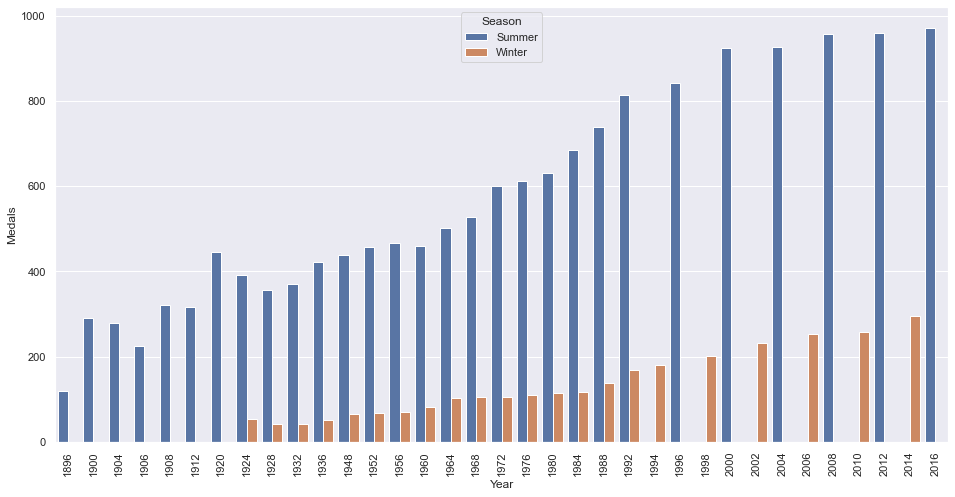

In [45]:
plt.figure("Summer and Winter Games", figsize=(16,8))
sns.barplot(x='Year', y='Medals', hue='Season', data=summer_winter)
plt.xticks(rotation=90)

In [46]:
games['Summer']     = games['Season'] == 'Summer'
games['Female']     = games['Gender'] == 'F'
games['Gold']       = games['Medal']  == 'Gold'
games['Silver']     = games['Medal']  == 'Silver'
games['Bronze']     = games['Medal']  == 'Bronze'
games['Home Field'] = games['NOC']    == games['Host Country']
print(games.shape)
games.head()

(270767, 17)


Year  Season        Games Host Country  NOC     Region  \
0  1896  Summer  1896 Summer          GRE  AUS  Australia   
1  1896  Summer  1896 Summer          GRE  AUS  Australia   
2  1896  Summer  1896 Summer          GRE  AUS  Australia   
3  1896  Summer  1896 Summer          GRE  AUS  Australia   
4  1896  Summer  1896 Summer          GRE  AUS  Australia   

                      Athlete Gender      Sport                         Event  \
0  Edwin Harold "Teddy" Flack      M     Tennis          Tennis Men's Singles   
1  Edwin Harold "Teddy" Flack      M     Tennis          Tennis Men's Doubles   
2  Edwin Harold "Teddy" Flack      M  Athletics    Athletics Men's 800 metres   
3  Edwin Harold "Teddy" Flack      M  Athletics  Athletics Men's 1,500 metres   
4  Edwin Harold "Teddy" Flack      M  Athletics      Athletics Men's Marathon   

    Medal  Summer  Female   Gold  Silver  Bronze  Home Field  
0     NaN    True   False  False   False   False       False  
1  Bronze    True   False  False   False    True       False  
2    Gold    True   False   True   False   False       False  
3    Gold    True   False   True   False   False       False  
4     NaN    True   False  False   False   False       False

In [47]:
# Total number of unique athletes
unique_athletes = pd.DataFrame(
    games.groupby(['Athlete','NOC','Region'])['Medal'].count())['Medal'].value_counts().sum()
print(unique_athletes)

# Distribution of number of medals won by an individual athlete
medal_distribution            = pd.DataFrame(pd.DataFrame(
    games.groupby(['Athlete','NOC','Region'])['Medal'].count())['Medal'].value_counts())
medal_distribution.index.name = 'All-Time Olympic Medals Won'
medal_distribution            = medal_distribution.rename(columns={'Medal': 'Athletes'})

# Percent distribution of number of medals won by an individual athlete
medal_distribution['Percentage of Athletes'] = medal_distribution['Athletes']/unique_athletes * 100
medal_distribution['Percentage of Athletes'] = medal_distribution['Percentage of Athletes'].round(3)
medal_distribution['Percentile'] = medal_distribution['Percentage of Athletes'].cumsum()
medal_distribution

136412


Athletes  Percentage of Athletes  Percentile
All-Time Olympic Medals Won                                              
0                              107876                  79.081      79.081
1                               21669                  15.885      94.966
2                                4561                   3.344      98.310
3                                1332                   0.976      99.286
4                                 522                   0.383      99.669
5                                 198                   0.145      99.814
6                                 111                   0.081      99.895
7                                  51                   0.037      99.932
8                                  37                   0.027      99.959
9                                  22                   0.016      99.975
10                                 14                   0.010      99.985
12                                  7                   0.005      99.990
11                                  5                   0.004      99.994
13                                  4                   0.003      99.997
18                                  1                   0.001      99.998
15                                  1                   0.001      99.999
28                                  1                   0.001     100.000

In [48]:
# Top athletes by number of medals won
athletes           = pd.DataFrame(games.groupby(['Athlete','NOC','Region'])['Gold','Silver','Bronze'].sum())
athletes['Gold']   = athletes['Gold'].astype('int64')
athletes['Silver'] = athletes['Silver'].astype('int64')
athletes['Bronze'] = athletes['Bronze'].astype('int64')
athletes['Medals'] = athletes['Gold'] + athletes['Silver'] + athletes['Bronze']
athletes           = athletes.sort_values(by='Medals', ascending=False)
athletes           = athletes.reset_index()
athletes           = athletes.rename(columns={'Gold':    'Golds',
                                              'Silver':  'Silvers',
                                              'Bronze':  'Bronzes'})
athletes.head(20)

<ipython-input-48-1ff1af7c6824>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Athlete  NOC          Region  \
0                           Michael Fred Phelps, II  USA             USA   
1                Larysa Semenivna Latynina (Diriy-)  URS          Russia   
2                      Nikolay Yefimovich Andrianov  URS          Russia   
3                               Edoardo Mangiarotti  ITA           Italy   
4                               Ole Einar Bjrndalen  NOR          Norway   
5                                       Takashi Ono  JPN           Japan   
6                       Borys Anfiyanovych Shakhlin  URS          Russia   
7                           Aleksey Yuryevich Nemov  RUS          Russia   
8                     Natalie Anne Coughlin (-Hall)  USA             USA   
9              Dara Grace Torres (-Hoffman, -Minas)  USA             USA   
10                             Paavo Johannes Nurmi  FIN         Finland   
11                               Ryan Steven Lochte  USA             USA   
12                                       Sawao Kato  JPN           Japan   
13  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  USA             USA   
14                           Vra slavsk (-Odloilov)  TCH  Czech Republic   
15                                Mark Andrew Spitz  USA             USA   
16                   Matthew Nicholas "Matt" Biondi  USA             USA   
17                        Viktor Ivanovych Chukarin  URS          Russia   
18                             Carl Townsend Osburn  USA             USA   
19                      Polina Hryhorivna Astakhova  URS          Russia   

    Golds  Silvers  Bronzes  Medals  
0      23        3        2      28  
1       9        5        4      18  
2       7        5        3      15  
3       6        5        2      13  
4       8        4        1      13  
5       5        4        4      13  
6       7        4        2      13  
7       4        2        6      12  
8       3        4        5      12  
9       4        4        4      12  
10      9        3        0      12  
11      6        3        3      12  
12      8        3        1      12  
13      8        3        1      12  
14      7        4        0      11  
15      9        1        1      11  
16      8        2        1      11  
17      7        3        1      11  
18      5        4        2      11  
19      5        2        3      10

In [49]:
# Top teams by number of medals won
teams           = medals.drop(['Year','Summer','Host','Females'], axis=1)
teams           = teams.merge(games[['Games','Host Country']].drop_duplicates(), how='left')
teams           = teams.sort_values(by='Medals', ascending=False)
teams           = teams.reset_index().drop(['index'], axis=1)
teams.head(20)

Games  NOC   Region  Athletes  Sports  Events  Medals  Golds  \
0   1904 Summer  USA      USA       524      18      95     230     76   
1   1980 Summer  URS   Russia       489      23     202     195     80   
2   1984 Summer  USA      USA       522      25     217     173     82   
3   1908 Summer  GBR       UK       735      24     108     143     56   
4   1988 Summer  URS   Russia       480      27     221     131     54   
5   1980 Summer  GDR  Germany       346      17     167     126     47   
6   1976 Summer  URS   Russia       410      22     189     125     49   
7   2016 Summer  USA      USA       555      33     245     121     46   
8   1992 Summer  EUN   Russia       475      27     234     112     45   
9   1932 Summer  USA      USA       474      17     122     110     44   
10  2008 Summer  USA      USA       588      32     258     110     36   
11  1992 Summer  USA      USA       545      28     248     108     37   
12  1968 Summer  USA      USA       357      18     167     107     45   
13  2012 Summer  USA      USA       529      31     245     103     46   
14  1960 Summer  URS   Russia       283      17     145     103     43   
15  1988 Summer  GDR  Germany       259      16     157     102     37   
16  1900 Summer  FRA   France       716      19      81     102     28   
17  2004 Summer  USA      USA       533      31     254     101     36   
18  1996 Summer  USA      USA       648      31     263     101     44   
19  1936 Summer  GER  Germany       433      22     143     101     38   

    Silvers  Bronzes  Athletes per Event Host Country  
0        79       75               5.516          USA  
1        69       46               2.421          URS  
2        61       30               2.406          USA  
3        50       37               6.806          GBR  
4        31       46               2.172          KOR  
5        37       42               2.072          URS  
6        41       35               2.169          CAN  
7        37       38               2.265          BRA  
8        38       29               2.030          ESP  
9        36       30               3.885          USA  
10       39       35               2.279          CHN  
11       34       37               2.198          ESP  
12       28       34               2.138          MEX  
13       28       29               2.159          GBR  
14       29       31               1.952          ITA  
15       35       30               1.650          KOR  
16       40       34               8.840          FRA  
17       39       26               2.098          GRE  
18       32       25               2.464          USA  
19       31       32               3.028          GER

In [50]:
nations = medals.groupby(['NOC','Region'])[['Medals','Golds','Silvers','Bronzes']].sum()
nations = nations.sort_values(by='Medals', ascending=False).reset_index()
nations.head(20)

NOC       Region  Medals  Golds  Silvers  Bronzes
0   USA          USA    2823   1131      901      791
1   URS       Russia    1197    471      373      353
2   GER      Germany    1004    319      345      340
3   GBR           UK     919    289      320      310
4   FRA       France     879    264      286      329
5   ITA        Italy     722    256      225      241
6   SWE       Sweden     657    200      215      242
7   CHN        China     595    239      184      172
8   RUS       Russia     584    202      183      199
9   GDR      Germany     519    192      165      162
10  AUS    Australia     519    153      170      196
11  HUN      Hungary     510    178      156      176
12  JPN        Japan     482    152      151      179
13  CAN       Canada     475    126      160      189
14  NOR       Norway     474    167      159      148
15  FIN      Finland     471    146      148      177
16  NED  Netherlands     407    125      133      149
17  SUI  Switzerland     346    108      122      116
18  AUT      Austria     326     85      118      123
19  KOR  South Korea     316    116      102       98

In [51]:
home         = medals[medals['Host'] == 1].groupby(['Games','NOC','Region']).sum()
home         = home.drop(['Year','Summer'], axis=1)
home         = home.reset_index()
home['Host'] = 'Host'

In [52]:
away         = medals[medals['Host'] == 0].groupby(['Games','NOC','Region']).sum()
away         = away.drop(['Year','Summer'], axis=1)
away         = away.reset_index()
away['Host'] = 'Guest'

In [53]:
home_away = pd.concat([home, away])
home_away = home_away.reset_index().drop('index', axis=1)
home_away

Games  NOC         Region   Host  Athletes  Females  Sports  \
0     1896 Summer  GRE         Greece   Host       102        0       9   
1     1900 Summer  FRA         France   Host       716       12      19   
2     1904 Summer  USA            USA   Host       524        6      18   
3     1906 Summer  GRE         Greece   Host       312        5      13   
4     1908 Summer  GBR             UK   Host       735       39      24   
...           ...  ...            ...    ...       ...      ...     ...   
3811  2016 Summer  VIE        Vietnam  Guest        22       12      10   
3812  2016 Summer  VIN  Saint Vincent  Guest         4        2       2   
3813  2016 Summer  YEM          Yemen  Guest         3        1       3   
3814  2016 Summer  ZAM         Zambia  Guest         7        2       4   
3815  2016 Summer  ZIM       Zimbabwe  Guest        30       21       7   

      Events  Medals  Golds  Silvers  Bronzes  Athletes per Event  
0         39      44     10       17       17               2.615  
1         81     102     28       40       34               8.840  
2         95     230     76       79       75               5.516  
3         70      35      8       14       13               4.457  
4        108     143     56       50       37               6.806  
...      ...     ...    ...      ...      ...                 ...  
3811      24       2      1        1        0               0.917  
3812       4       0      0        0        0               1.000  
3813       3       0      0        0        0               1.000  
3814       7       0      0        0        0               1.000  
3815      13       0      0        0        0               2.308  

[3816 rows x 13 columns]

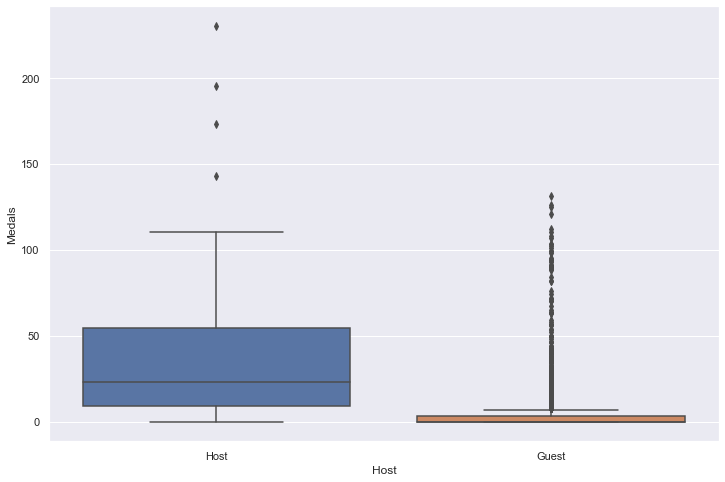

In [54]:
plt.figure("Home and Away Teams", figsize=(12,8))
sns.boxplot(x="Host", y="Medals", data=home_away);

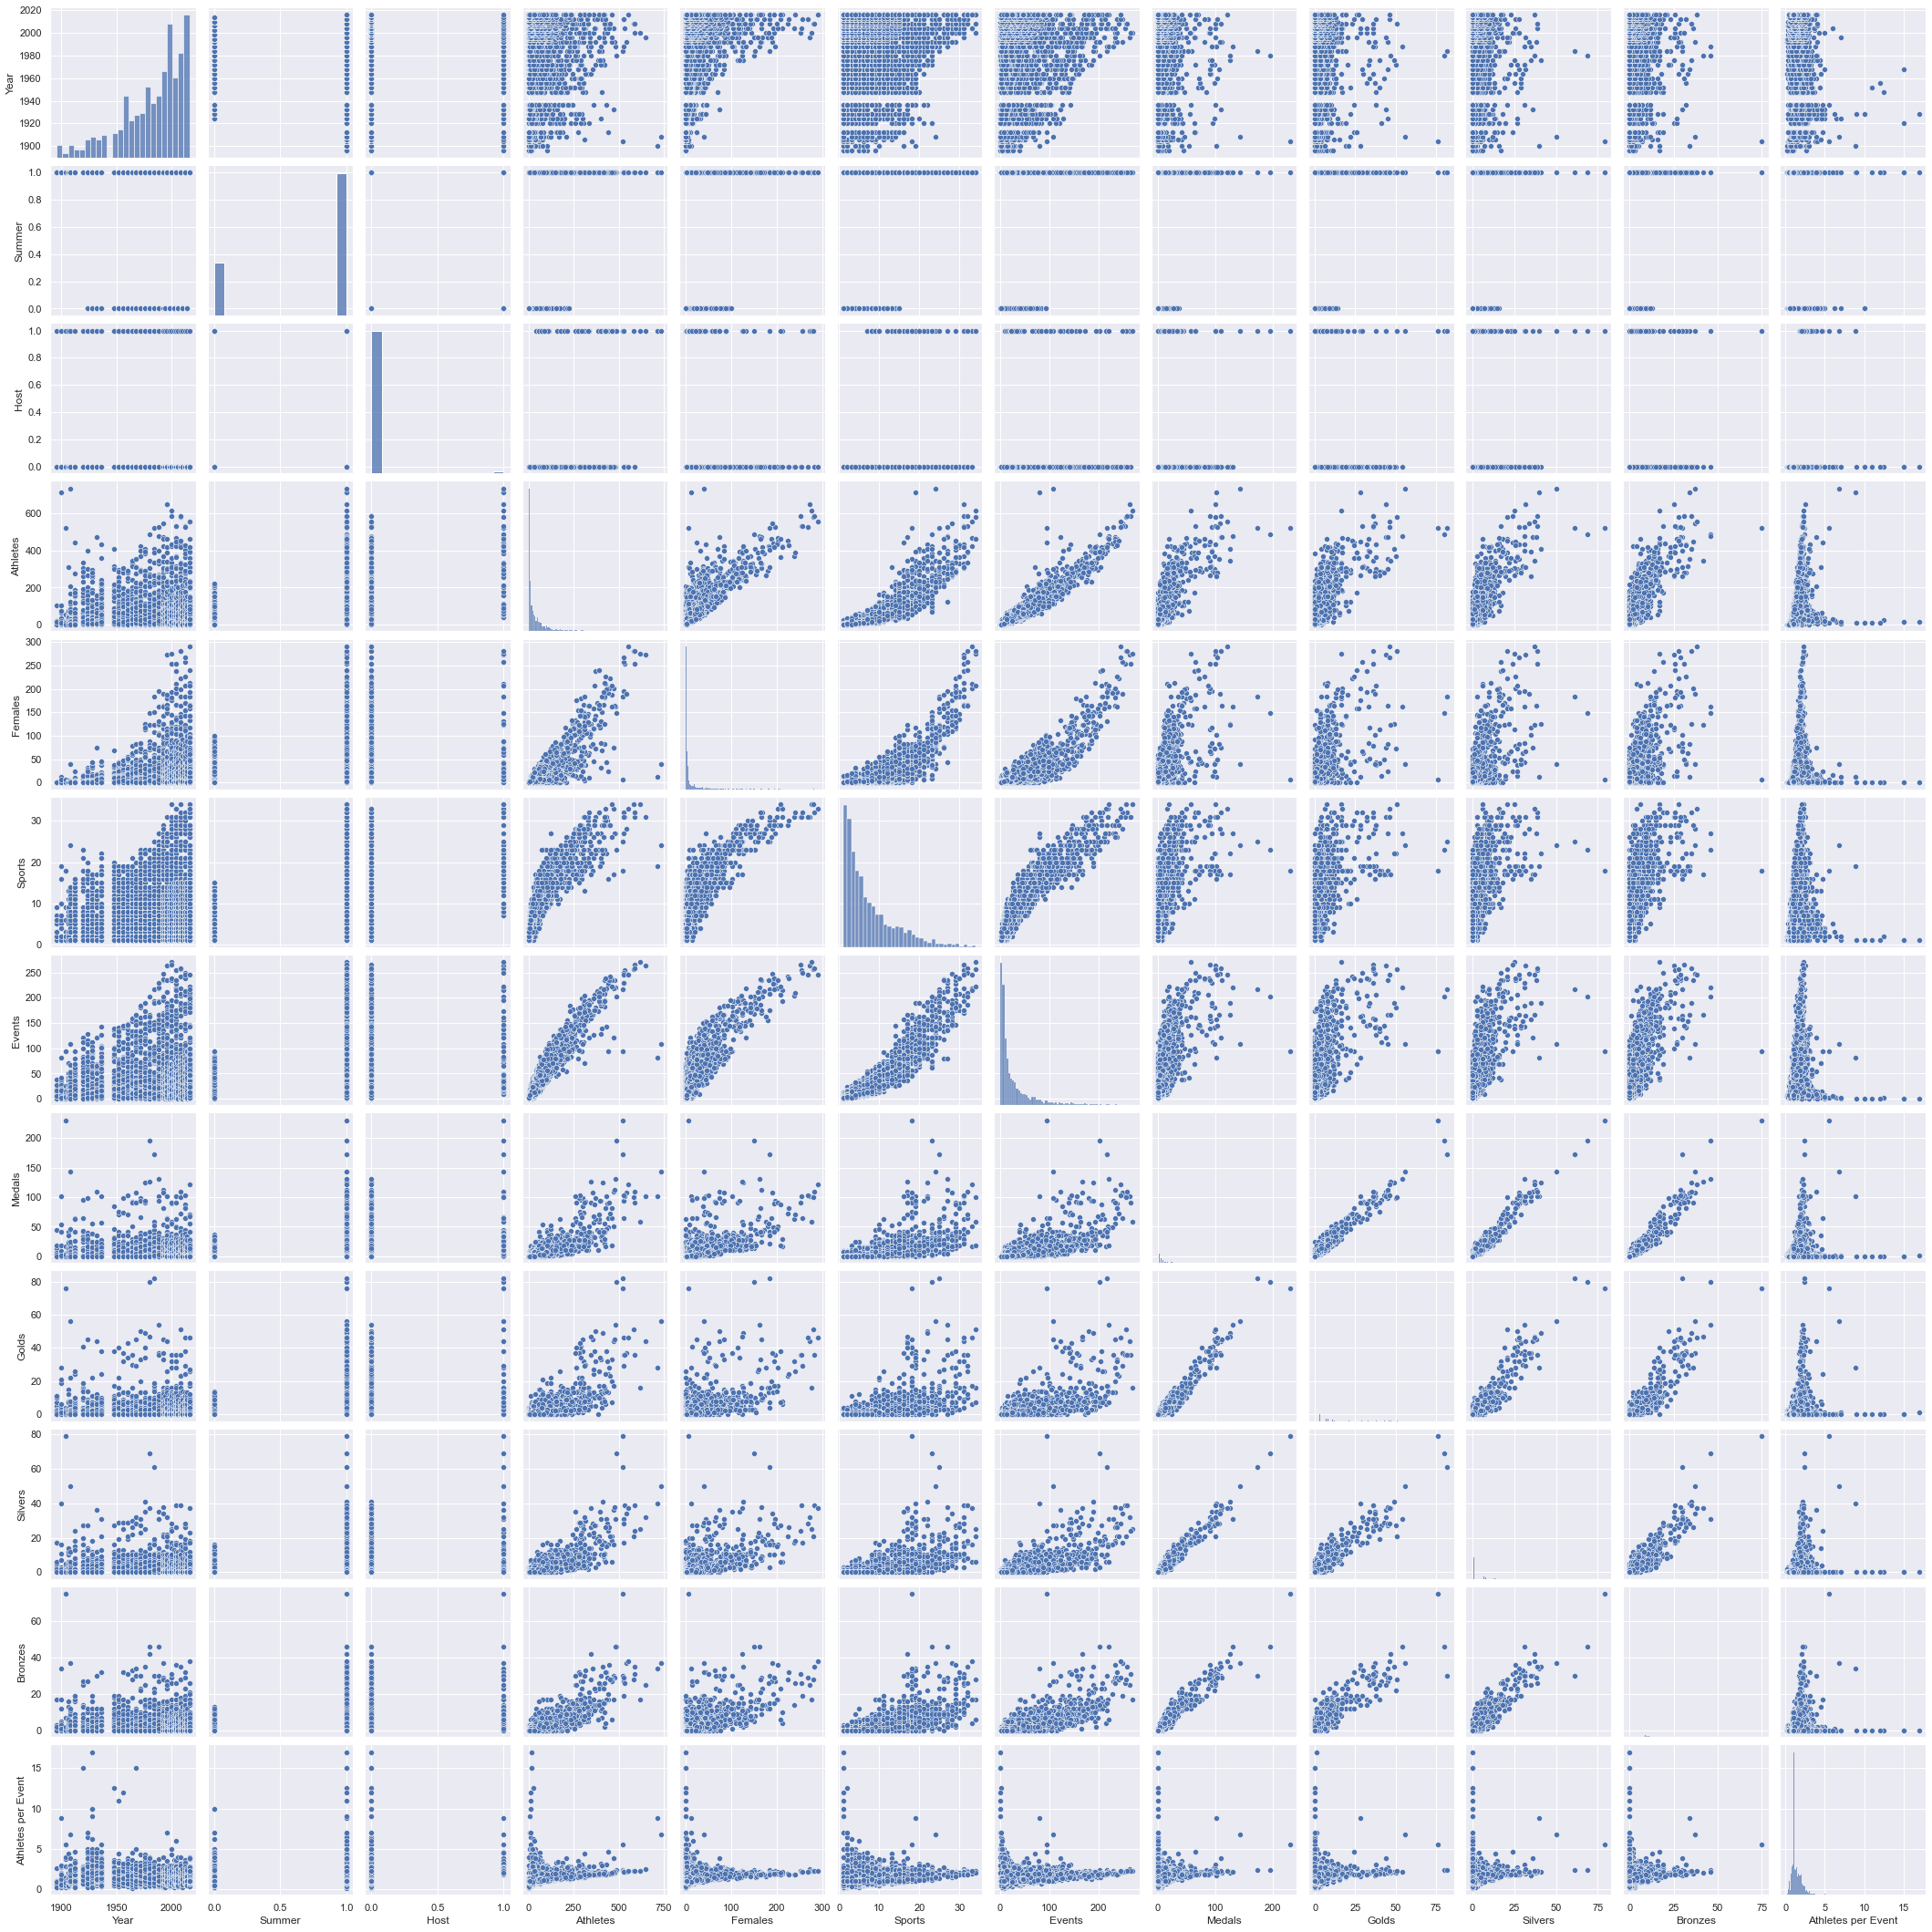

In [55]:
sns.pairplot(medals)
plt.show()

In [56]:
# variable correlation
correlation = pd.get_dummies(data=medals, columns=['NOC'])
correlation = correlation.corr()
correlation = correlation[['Medals','Golds','Silvers','Bronzes']]
correlation = correlation.sort_values(by='Medals', ascending=False)
correlation.head(30)

Medals     Golds   Silvers   Bronzes
Medals              1.000000  0.971749  0.975814  0.961790
Silvers             0.975814  0.926004  1.000000  0.915961
Golds               0.971749  1.000000  0.926004  0.891120
Bronzes             0.961790  0.891120  0.915961  1.000000
Athletes            0.822829  0.755188  0.810063  0.836929
Events              0.728377  0.656126  0.710624  0.762213
Females             0.685420  0.634583  0.663522  0.702166
Sports              0.602489  0.532692  0.590513  0.639645
NOC_USA             0.422431  0.451289  0.409034  0.360980
Host                0.313352  0.316312  0.322268  0.270382
NOC_URS             0.301585  0.315175  0.284638  0.273643
Athletes per Event  0.250266  0.229752  0.252120  0.248596
NOC_GER             0.165861  0.137231  0.175058  0.174475
NOC_GDR             0.161612  0.158779  0.155732  0.155395
NOC_RUS             0.145704  0.133165  0.137923  0.154536
NOC_CHN             0.115934  0.127361  0.107595  0.099678
NOC_GBR             0.108247  0.087784  0.117358  0.112794
NOC_EUN             0.101947  0.108397  0.101012  0.085371
NOC_FRA             0.101749  0.077142  0.100569  0.122425
Summer              0.093936  0.078473  0.090407  0.106888
NOC_ITA             0.076247  0.073737  0.070446  0.077820
NOC_SWE             0.067146  0.051086  0.066956  0.079973
NOC_FRG             0.065588  0.044809  0.067945  0.081570
NOC_AUS             0.049767  0.035088  0.049743  0.062458
NOC_JPN             0.048982  0.039275  0.045214  0.059674
NOC_HUN             0.044286  0.042751  0.038725  0.047540
NOC_FIN             0.039040  0.029864  0.035872  0.049445
NOC_CAN             0.038487  0.020174  0.040740  0.054261
NOC_NOR             0.038322  0.037975  0.040236  0.033065
NOC_NED             0.029463  0.021589  0.029365  0.036090

In [57]:
correlation = correlation.sort_values(by='Medals', ascending=True)
correlation.head(20)

Medals     Golds   Silvers   Bronzes
Year    -0.092073 -0.086700 -0.097733 -0.083760
NOC_ISL -0.034604 -0.030365 -0.033895 -0.037034
NOC_CHI -0.032913 -0.029381 -0.031040 -0.035861
NOC_LIE -0.032157 -0.028105 -0.032423 -0.033600
NOC_LIB -0.032120 -0.028279 -0.031404 -0.034323
NOC_LUX -0.031314 -0.026167 -0.030180 -0.035580
NOC_MON -0.031170 -0.026952 -0.031098 -0.033252
NOC_BER -0.028397 -0.024587 -0.028370 -0.030215
NOC_IND -0.027669 -0.023506 -0.028900 -0.028687
NOC_SMR -0.027452 -0.023577 -0.027205 -0.029665
NOC_POR -0.026917 -0.025223 -0.026563 -0.026695
NOC_AND -0.026845 -0.023056 -0.026603 -0.029009
NOC_PHI -0.026316 -0.024587 -0.026262 -0.025886
NOC_PER -0.025859 -0.022410 -0.024356 -0.029009
NOC_CYP -0.025330 -0.021977 -0.024573 -0.027652
NOC_PUR -0.025283 -0.022946 -0.025739 -0.025153
NOC_CRC -0.025216 -0.021862 -0.025221 -0.026765
NOC_BOL -0.024937 -0.021418 -0.024713 -0.026948
NOC_HKG -0.024814 -0.021300 -0.024573 -0.026846
NOC_SEN -0.024672 -0.021418 -0.023907 -0.026948

In [58]:
!pip install config

In [62]:
from   sklearn.linear_model    import LinearRegression
from   sklearn.metrics         import mean_squared_error, r2_score
import scipy.stats             as     stats
import statsmodels.api         as     sm
import warnings

sns.set(color_codes=True)
warnings.filterwarnings('ignore')

In [63]:
# Dummy Encoding

In [64]:
medals.shape

(3816, 15)

In [65]:
medals.head()

Year  Summer        Games  Host  NOC     Region  Athletes  Females  Sports  \
0  1896       1  1896 Summer     0  AUS  Australia         1        0       2   
1  1896       1  1896 Summer     0  AUT    Austria         3        0       3   
2  1896       1  1896 Summer     0  DEN    Denmark         3        0       5   
3  1896       1  1896 Summer     0  FRA     France        12        0       6   
4  1896       1  1896 Summer     0  GBR         UK        10        0       7   

   Events  Medals  Golds  Silvers  Bronzes  Athletes per Event  
0       5       3      2        0        1               0.200  
1       8       5      2        1        2               0.375  
2      12       6      1        2        3               0.250  
3      18      11      5        4        2               0.667  
4      19       9      3        3        3               0.526

In [66]:
# create dummy variables
model        = pd.get_dummies(data=medals, columns=['NOC'])
model['NOC'] = medals['NOC']
print(model.shape)
model.head()

(3816, 241)


Year  Summer        Games  Host     Region  Athletes  Females  Sports  \
0  1896       1  1896 Summer     0  Australia         1        0       2   
1  1896       1  1896 Summer     0    Austria         3        0       3   
2  1896       1  1896 Summer     0    Denmark         3        0       5   
3  1896       1  1896 Summer     0     France        12        0       6   
4  1896       1  1896 Summer     0         UK        10        0       7   

   Events  Medals  ...  NOC_VIN  NOC_VNM  NOC_WIF  NOC_YAR  NOC_YEM  NOC_YMD  \
0       5       3  ...        0        0        0        0        0        0   
1       8       5  ...        0        0        0        0        0        0   
2      12       6  ...        0        0        0        0        0        0   
3      18      11  ...        0        0        0        0        0        0   
4      19       9  ...        0        0        0        0        0        0   

   NOC_YUG  NOC_ZAM  NOC_ZIM  NOC  
0        0        0        0  AUS  
1        0        0        0  AUT  
2        0        0        0  DEN  
3        0        0        0  FRA  
4        0        0        0  GBR  

[5 rows x 241 columns]

In [67]:
# Train / Test Split

In [68]:
model = model[model['Year'] >= 1992]
model = model.reset_index().drop(['index'], axis=1)
print(model.shape)
model.head()

(1902, 241)


Year  Summer        Games  Host   Region  Athletes  Females  Sports  \
0  1992       1  1992 Summer     0  Curacao         4        1       3   
1  1992       1  1992 Summer     0  Albania         7        2       4   
2  1992       1  1992 Summer     0  Algeria        35        2       7   
3  1992       1  1992 Summer     0  Andorra         8        1       5   
4  1992       1  1992 Summer     0   Angola        28        3       6   

   Events  Medals  ...  NOC_VIN  NOC_VNM  NOC_WIF  NOC_YAR  NOC_YEM  NOC_YMD  \
0       4       0  ...        0        0        0        0        0        0   
1       8       0  ...        0        0        0        0        0        0   
2      27       2  ...        0        0        0        0        0        0   
3       5       0  ...        0        0        0        0        0        0   
4      21       0  ...        0        0        0        0        0        0   

   NOC_YUG  NOC_ZAM  NOC_ZIM  NOC  
0        0        0        0  AHO  
1        0        0        0  ALB  
2        0        0        0  ALG  
3        0        0        0  AND  
4        0        0        0  ANG  

[5 rows x 241 columns]

In [69]:
y = model[['Medals','Golds','Silvers','Bronzes','Year','NOC','Region']]
print(y.shape)
y.head()

(1902, 7)


Medals  Golds  Silvers  Bronzes  Year  NOC   Region
0       0      0        0        0  1992  AHO  Curacao
1       0      0        0        0  1992  ALB  Albania
2       2      1        0        1  1992  ALG  Algeria
3       0      0        0        0  1992  AND  Andorra
4       0      0        0        0  1992  ANG   Angola

In [70]:
X = model[['Year','NOC','Region','Summer','Host','Athletes','Events','Athletes per Event', 
           'NOC_USA','NOC_GER','NOC_GBR','NOC_FRA','NOC_ITA',
           'NOC_SWE','NOC_CHN','NOC_RUS','NOC_AUS','NOC_HUN',
           'NOC_JPN']]
print(X.shape)
X.head()

(1902, 19)


Year  NOC   Region  Summer  Host  Athletes  Events  Athletes per Event  \
0  1992  AHO  Curacao       1     0         4       4               1.000   
1  1992  ALB  Albania       1     0         7       8               0.875   
2  1992  ALG  Algeria       1     0        35      27               1.296   
3  1992  AND  Andorra       1     0         8       5               1.600   
4  1992  ANG   Angola       1     0        28      21               1.333   

   NOC_USA  NOC_GER  NOC_GBR  NOC_FRA  NOC_ITA  NOC_SWE  NOC_CHN  NOC_RUS  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   NOC_AUS  NOC_HUN  NOC_JPN  
0        0        0        0  
1        0        0        0  
2        0        0        0  
3        0        0        0  
4        0        0        0

In [71]:
X_train = X[X['Year'] <  2016]
X_test  = X[X['Year'] == 2016]
X_test  = X_test.reset_index().drop(['index'], axis=1)
print(X_train.shape)
print(X_test.shape)

y_train = y[y['Year'] <  2016]
y_test  = y[y['Year'] == 2016]
y_test  = y_test.reset_index().drop(['index'], axis=1)
print(y_train.shape)
print(y_test.shape)

(1698, 19)
(204, 19)
(1698, 7)
(204, 7)


In [72]:
X_train.head()

Year  NOC   Region  Summer  Host  Athletes  Events  Athletes per Event  \
0  1992  AHO  Curacao       1     0         4       4               1.000   
1  1992  ALB  Albania       1     0         7       8               0.875   
2  1992  ALG  Algeria       1     0        35      27               1.296   
3  1992  AND  Andorra       1     0         8       5               1.600   
4  1992  ANG   Angola       1     0        28      21               1.333   

   NOC_USA  NOC_GER  NOC_GBR  NOC_FRA  NOC_ITA  NOC_SWE  NOC_CHN  NOC_RUS  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   NOC_AUS  NOC_HUN  NOC_JPN  
0        0        0        0  
1        0        0        0  
2        0        0        0  
3        0        0        0  
4        0        0        0

In [73]:
# Linear Regression Training Model

In [74]:
# Create linear regression objects
regr_golds   = LinearRegression()
regr_silvers = LinearRegression()
regr_bronzes = LinearRegression()

In [75]:
# Train the models using the training sets
regr_golds.fit(  X_train.drop(['Year','NOC','Region'], axis=1), y_train['Golds'])
regr_silvers.fit(X_train.drop(['Year','NOC','Region'], axis=1), y_train['Silvers'])
regr_bronzes.fit(X_train.drop(['Year','NOC','Region'], axis=1), y_train['Bronzes'])

LinearRegression()

In [76]:
# Make predictions using the training sets
y_train['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(X_train.drop(['Year','NOC','Region'], axis=1)), columns=['Golds Prediction'])
y_train['Golds Prediction']   = y_train['Golds Prediction'].astype('int64')
y_train['Golds Prediction']   = y_train['Golds Prediction'].clip(lower=0)

y_train['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(X_train.drop(['Year','NOC','Region'], axis=1)), columns=['Silvers Prediction'])
y_train['Silvers Prediction'] = y_train['Silvers Prediction'].astype('int64')
y_train['Silvers Prediction'] = y_train['Silvers Prediction'].clip(lower=0)

y_train['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(X_train.drop(['Year','NOC','Region'], axis=1)), columns=['Bronzes Prediction'])
y_train['Bronzes Prediction'] = y_train['Bronzes Prediction'].astype('int64')
y_train['Bronzes Prediction'] = y_train['Bronzes Prediction'].clip(lower=0)

y_train['Medals Prediction']  = y_train['Golds Prediction'] + y_train['Silvers Prediction'] + y_train['Bronzes Prediction']
y_train.head()

Medals  Golds  Silvers  Bronzes  Year  NOC   Region  Golds Prediction  \
0       0      0        0        0  1992  AHO  Curacao                 0   
1       0      0        0        0  1992  ALB  Albania                 0   
2       2      1        0        1  1992  ALG  Algeria                 0   
3       0      0        0        0  1992  AND  Andorra                 0   
4       0      0        0        0  1992  ANG   Angola                 0   

   Silvers Prediction  Bronzes Prediction  Medals Prediction  
0                   0                   0                  0  
1                   0                   0                  0  
2                   0                   0                  0  
3                   0                   0                  0  
4                   0                   0                  0

In [77]:
# Intercepts
print(regr_golds.intercept_)
print(regr_silvers.intercept_)
print(regr_bronzes.intercept_)

0.7161394203474527
0.39914870956533466
0.2730754803319482


In [78]:
# The coefficients
columns                          = X_train.columns.drop(['Year','NOC','Region'])
features                         = pd.DataFrame(columns.T, columns=['Feature'])
features['Golds Coefficients']   = regr_golds.coef_.T
features['Silvers Coefficients'] = regr_silvers.coef_.T
features['Bronzes Coefficients'] = regr_bronzes.coef_.T

features = features.sort_values(by='Golds Coefficients', ascending=False).reset_index().drop(['index'],axis=1)
features

Feature  Golds Coefficients  Silvers Coefficients  \
0              NOC_CHN            7.968026              5.029021   
1              NOC_USA            6.786218              6.282054   
2              NOC_RUS            5.918139              5.197084   
3              NOC_GER            3.478583              3.980762   
4                 Host            1.319074             -1.762806   
5              NOC_HUN            1.099988              0.147335   
6             Athletes            0.069498              0.050743   
7               Summer           -0.051792             -0.116881   
8               Events           -0.056582             -0.027420   
9              NOC_FRA           -0.354553              0.028350   
10             NOC_GBR           -0.392903             -1.078488   
11  Athletes per Event           -0.793043             -0.491819   
12             NOC_SWE           -1.459278             -0.395760   
13             NOC_ITA           -1.598263             -1.262327   
14             NOC_JPN           -2.300319             -0.906917   
15             NOC_AUS           -2.608170             -0.311735   

    Bronzes Coefficients  
0               2.982639  
1               4.782652  
2               6.039099  
3               3.708376  
4              -3.705557  
5              -0.821623  
6               0.045893  
7              -0.065634  
8              -0.013392  
9               2.006628  
10             -0.233991  
11             -0.462264  
12             -1.014978  
13              0.139212  
14             -0.569647  
15             -0.024385

In [79]:
# Rio 2016 Validation Test Set

In [80]:
print(X_test.shape)
X_test.head()

(204, 19)


Year  NOC       Region  Summer  Host  Athletes  Events  Athletes per Event  \
0  2016  AFG  Afghanistan       1     0         3       3               1.000   
1  2016  ALB      Albania       1     0         6       6               1.000   
2  2016  ALG      Algeria       1     0        64      48               1.333   
3  2016  AND      Andorra       1     0         4       4               1.000   
4  2016  ANG       Angola       1     0        26      10               2.600   

   NOC_USA  NOC_GER  NOC_GBR  NOC_FRA  NOC_ITA  NOC_SWE  NOC_CHN  NOC_RUS  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   NOC_AUS  NOC_HUN  NOC_JPN  
0        0        0        0  
1        0        0        0  
2        0        0        0  
3        0        0        0  
4        0        0        0

In [81]:
# Make predictions using the test set
y_test['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(X_test.drop(['Year','NOC','Region'], axis=1)), columns=['Golds Prediction'])
y_test['Golds Prediction']   = y_test['Golds Prediction'].astype('int64')
y_test['Golds Prediction']   = y_test['Golds Prediction'].clip(lower=0)

y_test['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(X_test.drop(['Year','NOC','Region'], axis=1)), columns=['Silvers Prediction'])
y_test['Silvers Prediction'] = y_test['Silvers Prediction'].astype('int64')
y_test['Silvers Prediction'] = y_test['Silvers Prediction'].clip(lower=0)

y_test['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(X_test.drop(['Year','NOC','Region'], axis=1)), columns=['Bronzes Prediction'])
y_test['Bronzes Prediction'] = y_test['Bronzes Prediction'].astype('int64')
y_test['Bronzes Prediction'] = y_test['Bronzes Prediction'].clip(lower=0)

y_test['Medals Prediction']  = y_test['Golds Prediction'] + y_test['Silvers Prediction'] + y_test['Bronzes Prediction']
y_test.head()

Medals  Golds  Silvers  Bronzes  Year  NOC       Region  Golds Prediction  \
0       0      0        0        0  2016  AFG  Afghanistan                 0   
1       0      0        0        0  2016  ALB      Albania                 0   
2       2      0        2        0  2016  ALG      Algeria                 1   
3       0      0        0        0  2016  AND      Andorra                 0   
4       0      0        0        0  2016  ANG       Angola                 0   

   Silvers Prediction  Bronzes Prediction  Medals Prediction  
0                   0                   0                  0  
1                   0                   0                  0  
2                   1                   1                  3  
3                   0                   0                  0  
4                   0                   0                  0

In [82]:
rio_2016_medals = medals[medals['Games'] == '2016 Summer']
rio_2016_medals = y_test[['NOC','Medals Prediction']].merge(rio_2016_medals, on='NOC')
rio_2016_medals = rio_2016_medals.sort_values(by='Medals Prediction', ascending=False)
rio_2016_medals.head()

NOC  Medals Prediction  Year  Summer        Games  Host   Region  \
195  USA                 82  2016       1  2016 Summer     0      USA   
38   CHN                 57  2016       1  2016 Summer     0    China   
72   GER                 56  2016       1  2016 Summer     0  Germany   
26   BRA                 46  2016       1  2016 Summer     1   Brazil   
158  RUS                 44  2016       1  2016 Summer     0   Russia   

     Athletes  Females  Sports  Events  Medals  Golds  Silvers  Bronzes  \
195       555      291      33     245     121     46       37       38   
38        390      240      32     209      70     26       18       26   
72        418      194      29     217      42     17       10       15   
26        462      207      34     222      19      7        6        6   
158       284      142      29     181      56     19       17       20   

     Athletes per Event  
195               2.265  
38                1.866  
72                1.926  
26                2.081  
158               1.569

In [83]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train['Medals'], y_train['Medals Prediction']))
print('Variance score: %.2f' % r2_score(y_test['Medals'],  y_test['Medals Prediction']))

Variance score: 0.85
Variance score: 0.82


In [84]:
# The mean squared error
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train['Medals'], y_train['Medals Prediction'])))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test['Medals'],  y_test['Medals Prediction'])))

Root mean squared error: 4.44
Root mean squared error: 5.48


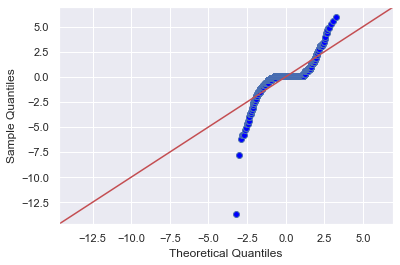

In [85]:
residuals = y_train['Medals Prediction'] - y_train['Medals']
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Tokyo 2020 Prediction

In [86]:
previous_medals = medals[medals['Year'] >= 2008]
previous_medals = previous_medals[previous_medals['Summer'] == 1]
previous_medals = previous_medals.groupby(
    ['NOC','Region'])['Athletes','Females','Sports','Events'].mean().astype('int64')
previous_medals = previous_medals.reset_index()
print(previous_medals.shape)
previous_medals.sort_values(by='Athletes',ascending=False).head()

(206, 6)


NOC     Region  Athletes  Females  Sports  Events
197  USA        USA       557      280      32     249
39   CHN      China       446      242      31     224
11   AUS  Australia       419      198      30     207
73   GER    Germany       407      182      28     212
69   GBR         UK       398      185      27     210

In [87]:
# copy Rio 2016 variables and update year
tokyo_2020_medals         = X_test
tokyo_2020_medals['Year'] = 2020

# change host to Japan
tokyo_2020_medals['Host']                                        = 0
tokyo_2020_medals.loc[tokyo_2020_medals['NOC'] == 'JPN', 'Host'] = 1

# update 2020 Athletes, Females, Sports and Events based on mean between 2008 and 2016
tokyo_2020_medals = tokyo_2020_medals.drop(['Athletes','Events'],axis=1)
tokyo_2020_medals = tokyo_2020_medals.merge(previous_medals)

# zero Athletes if no Events
tokyo_2020_medals.loc[tokyo_2020_medals['Events'] == 0, 'Athletes'] = 0

# update Athletes per Event
tokyo_2020_medals['Athletes per Event'] = tokyo_2020_medals['Athletes'] / tokyo_2020_medals['Events']
tokyo_2020_medals['Athletes per Event'] = (tokyo_2020_medals['Athletes per Event'].fillna(0)).round(3)

# reorder features
tokyo_2020_medals = tokyo_2020_medals[['Year','NOC','Region',
                                       'Summer','Host','Athletes','Events','Athletes per Event', 
                                       'NOC_USA','NOC_GER','NOC_GBR','NOC_FRA','NOC_ITA',
                                       'NOC_SWE','NOC_CHN','NOC_RUS','NOC_AUS','NOC_HUN',
                                       'NOC_JPN']]

print(tokyo_2020_medals.shape)
tokyo_2020_medals.sort_values(by='Athletes',ascending=False).head()

(204, 19)


Year  NOC     Region  Summer  Host  Athletes  Events  Athletes per Event  \
195  2020  USA        USA       1     0       557     249               2.237   
38   2020  CHN      China       1     0       446     224               1.991   
10   2020  AUS  Australia       1     0       419     207               2.024   
72   2020  GER    Germany       1     0       407     212               1.920   
68   2020  GBR         UK       1     0       398     210               1.895   

     NOC_USA  NOC_GER  NOC_GBR  NOC_FRA  NOC_ITA  NOC_SWE  NOC_CHN  NOC_RUS  \
195        1        0        0        0        0        0        0        0   
38         0        0        0        0        0        0        1        0   
10         0        0        0        0        0        0        0        0   
72         0        1        0        0        0        0        0        0   
68         0        0        1        0        0        0        0        0   

     NOC_AUS  NOC_HUN  NOC_JPN  
195        0        0        0  
38         0        0        0  
10         1        0        0  
72         0        0        0  
68         0        0        0

In [88]:
tokyo_2020_medals.describe()

Year  Summer        Host    Athletes      Events  Athletes per Event  \
count   204.0   204.0  204.000000  204.000000  204.000000          204.000000   
mean   2020.0     1.0    0.004902   52.745098   34.176471            1.252436   
std       0.0     0.0    0.070014   94.588212   51.125252            0.454733   
min    2020.0     1.0    0.000000    1.000000    1.000000            0.667000   
25%    2020.0     1.0    0.000000    5.000000    5.000000            1.000000   
50%    2020.0     1.0    0.000000   10.000000    9.000000            1.000000   
75%    2020.0     1.0    0.000000   55.250000   42.500000            1.378500   
max    2020.0     1.0    1.000000  557.000000  249.000000            3.625000   

          NOC_USA     NOC_GER     NOC_GBR     NOC_FRA     NOC_ITA     NOC_SWE  \
count  204.000000  204.000000  204.000000  204.000000  204.000000  204.000000   
mean     0.004902    0.004902    0.004902    0.004902    0.004902    0.004902   
std      0.070014    0.070014    0.070014    0.070014    0.070014    0.070014   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          NOC_CHN     NOC_RUS     NOC_AUS     NOC_HUN     NOC_JPN  
count  204.000000  204.000000  204.000000  204.000000  204.000000  
mean     0.004902    0.004902    0.004902    0.004902    0.004902  
std      0.070014    0.070014    0.070014    0.070014    0.070014  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [89]:
# Make predictions using the Tokyo 2020 set
y_2020                       = tokyo_2020_medals[['Year','NOC','Region']]

y_2020['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(tokyo_2020_medals.drop(['Year','NOC','Region'], axis=1)), columns=['Golds Prediction'])
y_2020['Golds Prediction']   = y_2020['Golds Prediction'].astype('int64')
y_2020['Golds Prediction']   = y_2020['Golds Prediction'].clip(lower=0)

y_2020['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(tokyo_2020_medals.drop(['Year','NOC','Region'], axis=1)), columns=['Silvers Prediction'])
y_2020['Silvers Prediction'] = y_2020['Silvers Prediction'].astype('int64')
y_2020['Silvers Prediction'] = y_2020['Silvers Prediction'].clip(lower=0)

y_2020['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(tokyo_2020_medals.drop(['Year','NOC','Region'], axis=1)), columns=['Bronzes Prediction'])
y_2020['Bronzes Prediction'] = y_2020['Bronzes Prediction'].astype('int64')
y_2020['Bronzes Prediction'] = y_2020['Bronzes Prediction'].clip(lower=0)

y_2020['Medals Prediction']  = y_2020['Golds Prediction'] + y_2020['Silvers Prediction'] + y_2020['Bronzes Prediction']
y_2020.head()

Year  NOC       Region  Golds Prediction  Silvers Prediction  \
0  2020  AFG  Afghanistan                 0                   0   
1  2020  ALB      Albania                 0                   0   
2  2020  ALG      Algeria                 0                   1   
3  2020  AND      Andorra                 0                   0   
4  2020  ANG       Angola                 0                   0   

   Bronzes Prediction  Medals Prediction  
0                   0                  0  
1                   0                  0  
2                   1                  2  
3                   0                  0  
4                   0                  0

In [90]:
tokyo_2020_medals = y_2020.merge(tokyo_2020_medals, on=['Year','NOC','Region'])
tokyo_2020_medals = tokyo_2020_medals.sort_values(by='Medals Prediction', ascending=False).reset_index()
tokyo_2020_medals[['NOC','Region','Host','Athletes','Events','Athletes per Event',
                   'Golds Prediction','Silvers Prediction','Bronzes Prediction','Medals Prediction']].head(20)

NOC       Region  Host  Athletes  Events  Athletes per Event  \
0   USA          USA     0       557     249               2.237   
1   CHN        China     0       446     224               1.991   
2   RUS       Russia     0       389     220               1.768   
3   GER      Germany     0       407     212               1.920   
4   AUS    Australia     0       419     207               2.024   
5   GBR           UK     0       398     210               1.895   
6   FRA       France     0       341     198               1.722   
7   BRA       Brazil     0       326     168               1.940   
8   ESP        Spain     0       289     142               2.035   
9   CAN       Canada     0       305     179               1.704   
10  ITA        Italy     0       307     176               1.744   
11  JPN        Japan     1       319     180               1.772   
12  KOR  South Korea     0       239     133               1.797   
13  NED  Netherlands     0       215     105               2.048   
14  POL       Poland     0       233     152               1.533   
15  NZL  New Zealand     0       183      88               2.080   
16  UKR      Ukraine     0       225     164               1.372   
17  ARG    Argentina     0       161      72               2.236   
18  BLR      Belarus     0       152     106               1.434   
19  HUN      Hungary     0       158     116               1.362   

    Golds Prediction  Silvers Prediction  Bronzes Prediction  \
0                 30                  26                  26   
1                 25                  20                  19   
2                 19                  18                  20   
3                 18                  18                  18   
4                 13                  14                  15   
5                 14                  12                  14   
6                 11                  11                  14   
7                 12                  11                  12   
8                 11                  10                  10   
9                 10                  10                  11   
10                 9                   8                  11   
11                10                   7                   7   
12                 8                   7                   8   
13                 8                   7                   7   
14                 7                   7                   8   
15                 6                   6                   6   
16                 5                   6                   7   
17                 6                   5                   5   
18                 4                   4                   5   
19                 5                   4                   4   

    Medals Prediction  
0                  82  
1                  64  
2                  57  
3                  54  
4                  42  
5                  40  
6                  36  
7                  35  
8                  31  
9                  31  
10                 28  
11                 24  
12                 23  
13                 22  
14                 22  
15                 18  
16                 18  
17                 16  
18                 13  
19                 13

In [114]:
tokyo_2020_medals[['NOC','Region','Host','Athletes','Events','Athletes per Event',
                   'Golds Prediction','Silvers Prediction','Bronzes Prediction','Medals Prediction']].head(60)

NOC          Region  Host  Athletes  Events  Athletes per Event  \
0   USA             USA     0       557     249               2.237   
1   CHN           China     0       446     224               1.991   
2   RUS          Russia     0       389     220               1.768   
3   GER         Germany     0       407     212               1.920   
4   AUS       Australia     0       419     207               2.024   
5   GBR              UK     0       398     210               1.895   
6   FRA          France     0       341     198               1.722   
7   BRA          Brazil     0       326     168               1.940   
8   ESP           Spain     0       289     142               2.035   
9   CAN          Canada     0       305     179               1.704   
10  ITA           Italy     0       307     176               1.744   
11  JPN           Japan     1       319     180               1.772   
12  KOR     South Korea     0       239     133               1.797   
13  NED     Netherlands     0       215     105               2.048   
14  POL          Poland     0       233     152               1.533   
15  NZL     New Zealand     0       183      88               2.080   
16  UKR         Ukraine     0       225     164               1.372   
17  ARG       Argentina     0       161      72               2.236   
18  BLR         Belarus     0       152     106               1.434   
19  HUN         Hungary     0       158     116               1.362   
20  RSA    South Africa     0       131      74               1.770   
21  CUB            Cuba     0       128      95               1.347   
22  SRB          Serbia     0       102      51               2.000   
23  GRE          Greece     0       115      82               1.402   
24  SWE          Sweden     0       135      80               1.688   
25  CZE  Czech Republic     0       123      98               1.255   
26  DEN         Denmark     0       105      66               1.591   
27  COL        Colombia     0       103      80               1.288   
28  ROU         Romania     0       100      72               1.389   
29  CRO         Croatia     0        97      55               1.764   
30  EGY           Egypt     0       110      80               1.375   
31  MEX          Mexico     0       101      76               1.329   
32  BEL         Belgium     0       103      66               1.561   
33  IND           India     0        82      56               1.464   
34  KAZ      Kazakhstan     0       114     103               1.107   
35  VEN       Venezuela     0        87      76               1.145   
36  SUI     Switzerland     0        94      75               1.253   
37  TUR          Turkey     0        93      78               1.192   
38  POR        Portugal     0        81      67               1.209   
39  AUT         Austria     0        70      64               1.094   
40  NOR          Norway     0        69      49               1.408   
41  IRL         Ireland     0        65      51               1.275   
42  LTU       Lithuania     0        66      52               1.269   
43  NGR         Nigeria     0        64      34               1.882   
44  KEN           Kenya     0        57      25               2.280   
45  MAR         Morocco     0        52      38               1.368   
46  IRI            Iran     0        56      45               1.244   
47  TUN         Tunisia     0        56      41               1.366   
48  JAM         Jamaica     0        50      28               1.786   
49  TPE          Taiwan     0        59      42               1.405   
50  FIN         Finland     0        55      57               0.965   
51  ALG         Algeria     0        52      40               1.300   
52  SLO        Slovenia     0        63      57               1.105   
53  UZB      Uzbekistan     0        59      62               0.952   
54  BUL        Bulgaria     0        61      55               1.109   
55  PRK     North Korea     

In [135]:
finmed=tokyo_2020_medals[['NOC','Region','Host','Athletes','Events','Athletes per Event',
                   'Golds Prediction','Silvers Prediction','Bronzes Prediction','Medals Prediction']]

In [136]:
finmed1=finmed.sort_values(by='Region')

In [137]:
pd.set_option('display.max_rows', None)

finmed1

NOC                            Region  Host  Athletes  Events  \
120  AFG                       Afghanistan     0         4       4   
168  ALB                           Albania     0         8       9   
51   ALG                           Algeria     0        52      40   
149  ASA                    American Samoa     0         4       4   
144  AND                           Andorra     0         5       5   
145  ANG                            Angola     0        30       9   
146  ANT                           Antigua     0         5       4   
17   ARG                         Argentina     0       161      72   
147  ARM                           Armenia     0        26      28   
148  ARU                             Aruba     0         4       4   
4    AUS                         Australia     0       419     207   
39   AUT                           Austria     0        70      64   
61   AZE                        Azerbaijan     0        50      52   
150  BAH                           Bahamas     0        25      19   
143  BRN                           Bahrain     0        19      14   
151  BAN                        Bangladesh     0         5       6   
152  BAR                          Barbados     0         8       9   
18   BLR                           Belarus     0       152     106   
32   BEL                           Belgium     0       103      66   
158  BIZ                            Belize     0         3       3   
154  BEN                             Benin     0         5       5   
155  BER                           Bermuda     0         7       7   
156  BHU                            Bhutan     0         2       2   
159  BOL                            Boliva     0         8       7   
157  BIH            Bosnia and Herzegovina     0         7       7   
160  BOT                          Botswana     0         9       7   
7    BRA                            Brazil     0       326     168   
141  BRU                            Brunei     0         3       3   
54   BUL                          Bulgaria     0        61      55   
122  BUR                      Burkina Faso     0         5       5   
153  BDI                           Burundi     0         6       6   
123  CAM                          Cambodia     0         5       5   
129  CMR                          Cameroon     0        28      15   
9    CAN                            Canada     0       305     179   
133  CPV                        Cape Verde     0         3       3   
124  CAY                    Cayman Islands     0         4       5   
140  CAF          Central African Republic     0         5       5   
126  CHA                              Chad     0         2       2   
127  CHI                             Chile     0        34      32   
1    CHN                             China     0       446     224   
199  HKG                             China     0        37      36   
27   COL                          Colombia     0       103      80   
132  COM                           Comoros     0         3       3   
131  COK                      Cook Islands     0         7       7   
134  CRC                        Costa Rica     0        10      10   
29   CRO                           Croatia     0        97      55   
21   CUB                              Cuba     0       128      95   
135  CYP                            Cyprus     0        15      16   
25   CZE                    Czech Republic     0       123      98   
130  COD  Democratic Republic of the Congo     0         4       4   
26   DEN                           Denmark     0       105      66   
136  DJI                          Djibouti     0         4       4   
137  DMA                          Dominica     0         2       2   
138  DOM                Dominican Republic     0        27      21   
139  ECU                           Ecuador     0        32      28   
30   EGY                             Egypt     0       110      80   
142  ESA       

In [146]:
finmed1[['Region','Medals Prediction']]

Region  Medals Prediction
120                       Afghanistan                  0
168                           Albania                  0
51                            Algeria                  2
149                    American Samoa                  0
144                           Andorra                  0
145                            Angola                  0
146                           Antigua                  0
17                          Argentina                 16
147                           Armenia                  0
148                             Aruba                  0
4                           Australia                 42
39                            Austria                  4
61                         Azerbaijan                  1
150                           Bahamas                  0
143                           Bahrain                  0
151                        Bangladesh                  0
152                          Barbados                  0
18                            Belarus                 13
32                            Belgium                  7
158                            Belize                  0
154                             Benin                  0
155                           Bermuda                  0
156                            Bhutan                  0
159                            Boliva                  0
157            Bosnia and Herzegovina                  0
160                          Botswana                  0
7                              Brazil                 35
141                            Brunei                  0
54                           Bulgaria                  2
122                      Burkina Faso                  0
153                           Burundi                  0
123                          Cambodia                  0
129                          Cameroon                  0
9                              Canada                 31
133                        Cape Verde                  0
124                    Cayman Islands                  0
140          Central African Republic                  0
126                              Chad                  0
127                             Chile                  0
1                               China                 64
199                             China                  0
27                           Colombia                  7
132                           Comoros                  0
131                      Cook Islands                  0
134                        Costa Rica                  0
29                            Croatia                  7
21                               Cuba                 10
135                            Cyprus                  0
25                     Czech Republic                  8
130  Democratic Republic of the Congo                  0
26                            Denmark                  8
136                          Djibouti                  0
137                          Dominica                  0
138                Dominican Republic                  0
139                           Ecuador                  0
30                              Egypt                  7
142                       El Salvador                  0
191                 Equatorial Guinea                  0
161                           Eritrea                  0
58                            Estonia                  1
162                          Ethiopia                  0
184                              Fiji                  0
50                            Finland                  2
6                              France                 36
187                             Gabon                  0
188                            Gambia                  0
190                           Georgia                  0
3                             Germany                 54
192                             Ghana                  0
23                             Greece    

In [149]:
MenOverTime = games[(games.Sex == 'M') & (games.Season == 'Summer')]
WomenOverTime = games[(games.Sex == 'F') & (games.Season == 'Summer')]

In [151]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time');

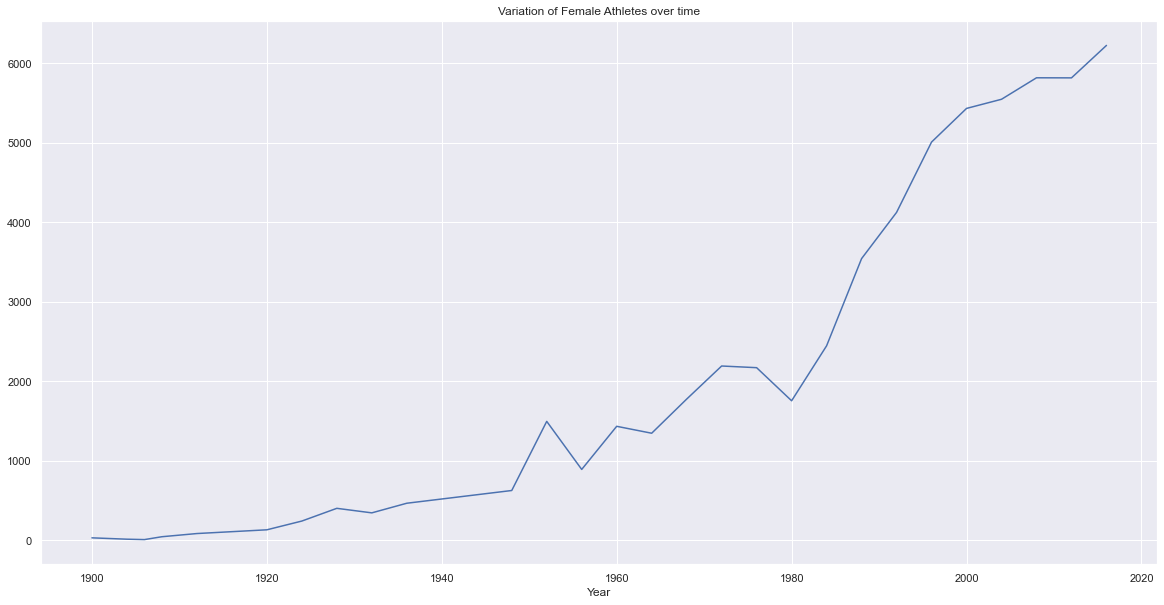

In [153]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time');

In [154]:
MenOverTime.loc[MenOverTime['Age'] > 80].head(10)

ID                        Name Sex   Age  Height  Weight  \
45965   118789                Louis Tauzin   M  81.0     NaN     NaN   
235085  128719      John Quincy Adams Ward   M  97.0     NaN     NaN   
59104    31173  Thomas Cowperthwait Eakins   M  88.0     NaN     NaN   
59105    31173  Thomas Cowperthwait Eakins   M  88.0     NaN     NaN   
59106    31173  Thomas Cowperthwait Eakins   M  88.0     NaN     NaN   
60981    49663               Winslow Homer   M  96.0     NaN     NaN   
25855    77710        Robert Tait McKenzie   M  81.0     NaN     NaN   
13820     5146       George Denholm Armour   M  84.0     NaN     NaN   

                 Team  NOC        Games  Year  Season         City  \
45965          France  FRA  1924 Summer  1924  Summer        Paris   
235085  United States  USA  1928 Summer  1928  Summer    Amsterdam   
59104   United States  USA  1932 Summer  1932  Summer  Los Angeles   
59105   United States  USA  1932 Summer  1932  Summer  Los Angeles   
59106   United States  USA  1932 Summer  1932  Summer  Los Angeles   
60981   United States  USA  1932 Summer  1932  Summer  Los Angeles   
25855          Canada  CAN  1948 Summer  1948  Summer       London   
13820   Great Britain  GBR  1948 Summer  1948  Summer       London   

                   Sport                                              Event  \
45965   Art Competitions                 Art Competitions Mixed Sculpturing   
235085  Art Competitions        Art Competitions Mixed Sculpturing, Statues   
59104   Art Competitions     Art Competitions Mixed Painting, Unknown Event   
59105   Art Competitions     Art Competitions Mixed Painting, Unknown Event   
59106   Art Competitions     Art Competitions Mixed Painting, Unknown Event   
60981   Art Competitions     Art Competitions Mixed Painting, Unknown Event   
25855   Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event   
13820   Art Competitions     Art Competitions Mixed Painting, Unknown Event   

       Medal    Host City Host Country  Unnamed: 2  
45965    NaN        Paris          FRA         NaN  
235085   NaN    Amsterdam          NED         NaN  
59104    NaN  Los Angeles          USA         NaN  
59105    NaN  Los Angeles          USA         NaN  
59106    NaN  Los Angeles          USA         NaN  
60981    NaN  Los Angeles          USA         NaN  
25855    NaN       London          GBR         NaN  
13820    NaN       London          GBR         NaN

Art competitions formed part of the modern Olympic Games during its early years, from 1912 to 1948. The competitions were part of the original intention of the Olympic Movement's founder, Pierre de Frédy, Baron de Coubertin. Medals were awarded for works of art inspired by sport, divided into five categories: architecture, literature, music, painting, and sculpture.

In [158]:
inMenOverTime = MenOverTime.loc[MenOverTime['Team'] == 'India']

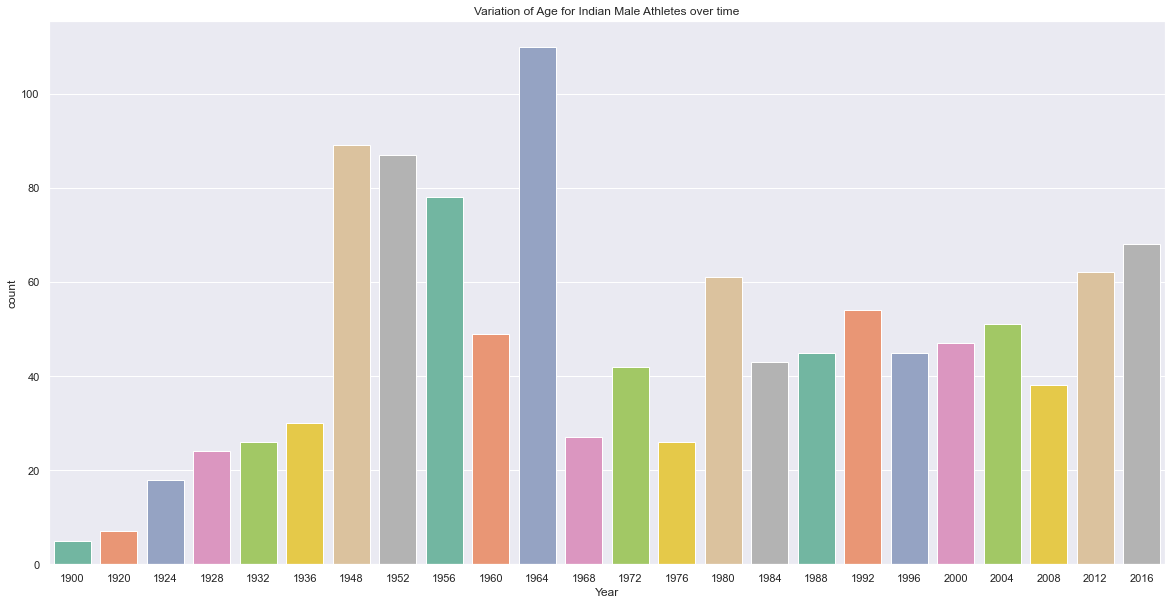

In [162]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=inMenOverTime, palette='Set2')
plt.title('Variation of Age for Indian Male Athletes over time');

In [164]:
inWomenOverTime = WomenOverTime.loc[WomenOverTime['Team'] == 'India']

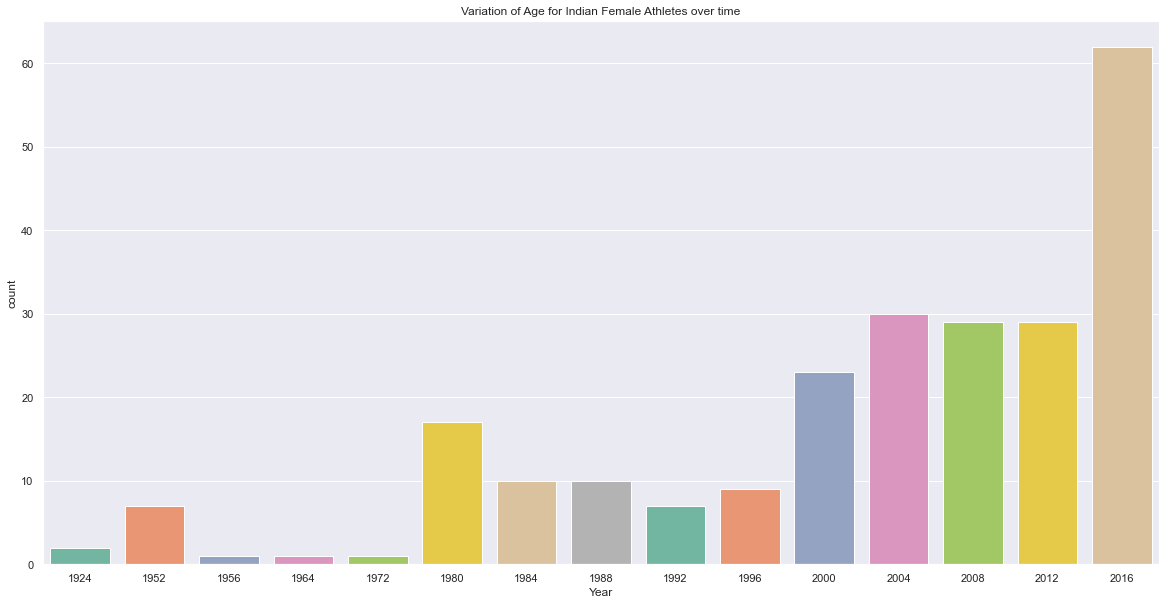

In [166]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=inWomenOverTime, palette='Set2')
plt.title('Variation of Age for Indian Female Athletes over time');

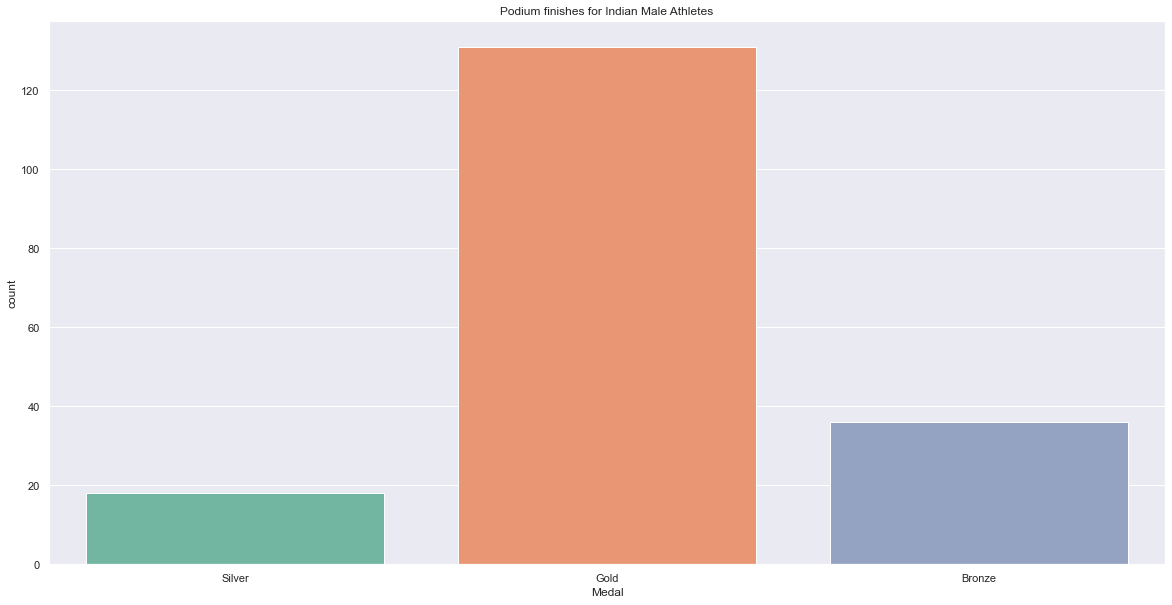

In [175]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Medal', data=inMenOverTime, palette='Set2')
plt.title('Podium finishes for Indian Male Athletes');

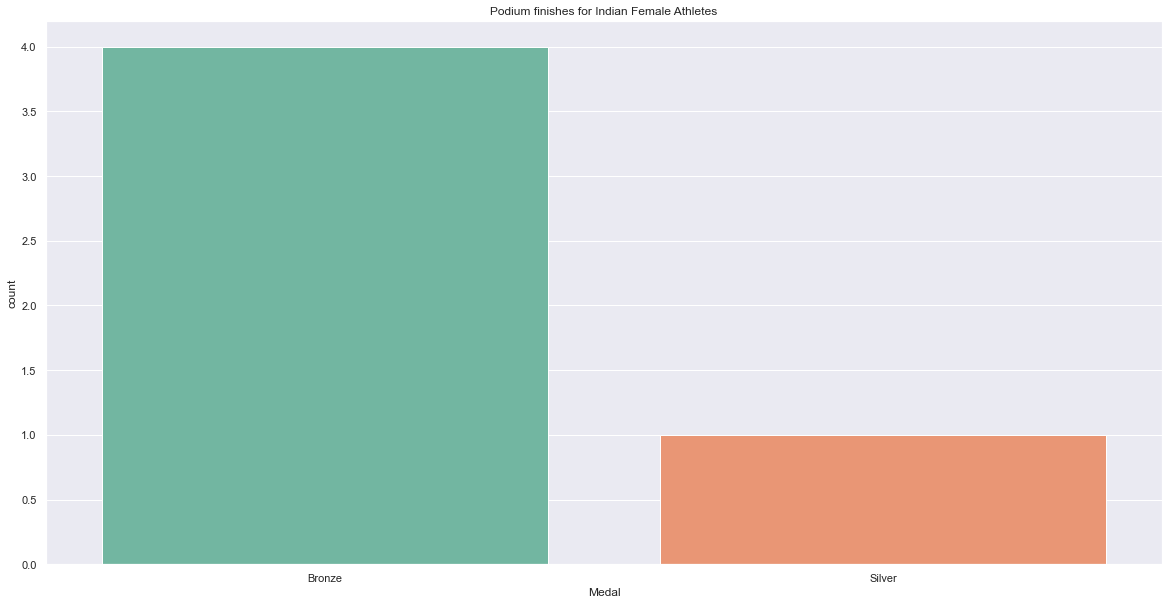

In [176]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Medal', data=inWomenOverTime, palette='Set2')
plt.title('Podium finishes for Indian Female Athletes');

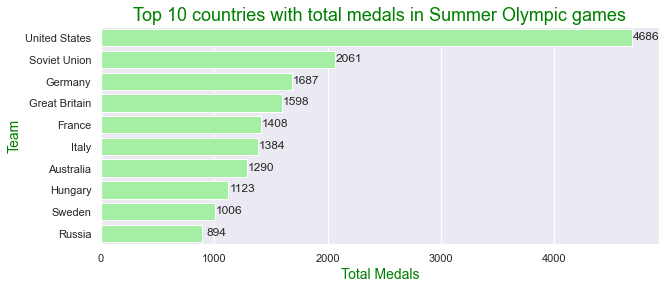

In [182]:
t10_summer = games[(games['Season']=='Summer') & (games['Medal']!='No Medal')].groupby('Team').count().reset_index()[['Team','Medal']].sort_values('Medal', ascending=False).head(10)
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x="Medal", y="Team", data=t10_summer, label="Team", color="palegreen")

for p in ax.patches:
    ax.text(p.get_width() + 125,
            p.get_y() + (p.get_height()/2) + .1,
            '{:1.0f}'.format(p.get_width()),
            ha="center")

ax.set_xlabel('Total Medals', size=14, color="green")
ax.set_ylabel('Team', size=14, color="green")
ax.set_title('Top 10 countries with total medals in Summer Olympic games', size=18, color="green")
plt.show()

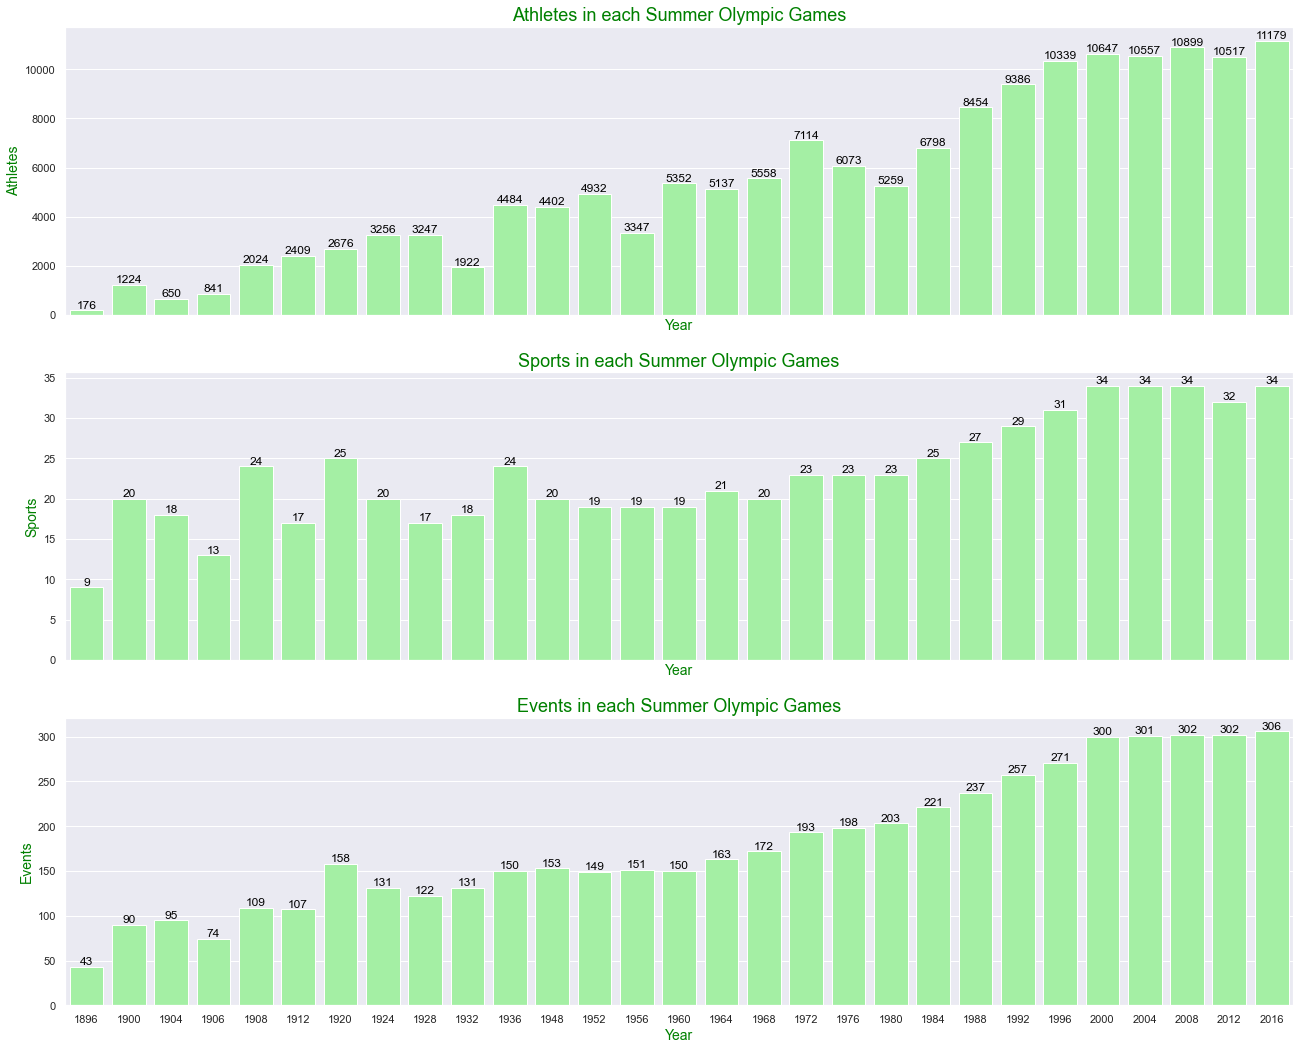

In [184]:
summer = games[games['Season']=='Summer']

summer_athletes = summer.pivot_table(summer, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','ID']]
summer_sports = summer.groupby('Year')['Sport'].nunique().reset_index()
summer_events = summer.groupby('Year')['Event'].nunique().reset_index()

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(22,18))

sns.barplot(x='Year', y='ID', data=summer_athletes, ax=ax[0], color="palegreen")
sns.barplot(x='Year', y='Sport', data=summer_sports, ax=ax[1], color="palegreen")
sns.barplot(x='Year', y='Event', data=summer_events, ax=ax[2], color="palegreen")

j = 0
for i in ['Athletes', 'Sports', 'Events']:
    ax[j].set_xlabel('Year', size=14, color="green")
    ax[j].set_ylabel(i, size=14, color="green")
    ax[j].set_title(i + ' in each Summer Olympic Games', size=18, color="green")
    j = j + 1
    
for i in range(3):
    for p in ax[i].patches:
        ax[i].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=12, color='black', ha='center', va='bottom')
plt.show()